# Modelos ARMA

Antes de comenzar la lección es importante verificar que nuestro directorio de trabajo sea el indicado.

In [112]:
setwd("C:/Users/oscar/OneDrive/Escritorio/AST")
getwd()

[1] "C:/Users/oscar/OneDrive/Escritorio/AST"

Este curso trata sobre las herramientas econométricas utilizadas para el análisis de series de tiempo.

¿Qué es una serie de tiempo? Pues formalmente es la realización de un proceso estocástico que no es más que una sucesión de variables aleatorias indexadas al tiempo. En términos un poco más informales diríamos que una serie de tiempo es una variable indexada al tiempo simplemente.

Como ejemplo podemos considerar la serie de tiempo del PIB anual de Bolivia.

In [113]:
# Descargar datos del PIB Anual del INE
if (!(file.exists("./Datos/PIB.xlsx"))){
        url1 <- "https://www.ine.gob.bo/index.php/descarga/491/pib-segun-actividad-economica/46183/bolivia-producto-interno-bruto-a-precios-constantes-segun-actividad-economica-1988-2019.xlsx"
        download.file(url1, destfile = "./Datos/PIB.xlsx", mode = "wb")
}

In [114]:
# Instalar el conjunto de paquetes tidyverse
# install.packages("tidyverse")
# Se procede a cargar los paquetes
library(ggplot2)
library(readxl)

In [115]:
pib_raw <- read_xlsx("./Datos/PIB.xlsx", sheet = 1, range = "B10:AG11", col_names = FALSE)
pib_raw <- as.data.frame(t(pib_raw), stringAsFactors = FALSE)
rownames(pib_raw) <- NULL
colnames(pib_raw) <- c("Fecha", "PIB")
head(pib_raw)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...


Fecha,PIB
1988,14219987
1989,14758943
1990,15443136
1991,16256453
1992,16524115
1993,17229578


In [116]:
tail(pib_raw)

,Fecha,PIB
27,2014,40588156
28,2015,42559599
29,2016,44374306
30,2017(p),46235899.827093497
31,2018(p),48188730.162800297
32,2019(p),49256932.52842477


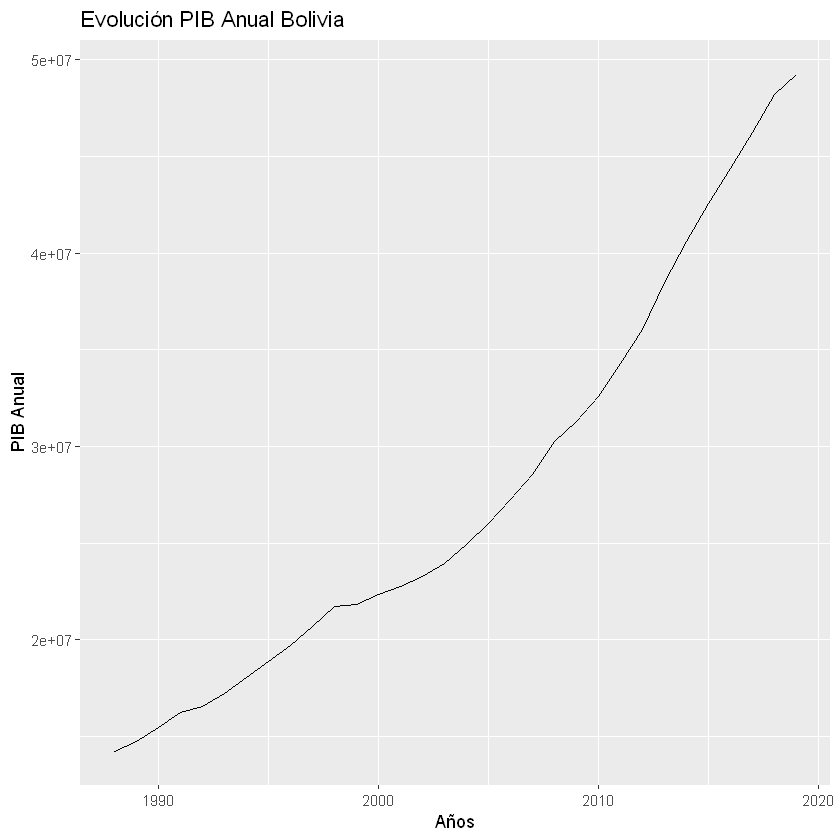

In [117]:
# Procedemos a graficar el PIB Anual de Bolivia
fecha <- seq(as.Date("01/01/1988", "%d/%m/%Y"), as.Date("01/01/2019", "%d/%m/%Y"), by = "year")
pib_raw$Fecha <- fecha
g <- ggplot(data = pib_raw, aes(x = Fecha, y = as.numeric(as.character(PIB))))
g + geom_line() + labs(title = "Evolución PIB Anual Bolivia", x = "Años", y = "PIB Anual")

Este es un ejemplo de una serie de tiempo. Antes de comenzar a estudiar las herramientas del análisis de las series de tiempo es importante conocer la matemática básica necesaria para el entendimiento de las series de tiempo.

Esta herramienta básica son las ecuaciones en diferencia.

## 1. Ecuaciones en diferencia 

Una ecuación en diferencia no es más que una relacion dinámica de una variable determinística o aleatoria. Empezemos con el modelo determinístico. Sea $y_t$ una serie de tiempo que presenta la siguiente relación:

$$y_t = \phi y_{t - 1} + w_t$$

Esta es una **ecuación en diferencia de primer orden**. Necesitamos saber tres cosas:
- ¿Cuál es su solución?
- ¿Cuál es la condición de estabilidad?
- ¿Cuál es el impacto de una variación de $w_t$ en $y_{t + j}$ a medida que $j \to \infty$?

Supongamos que conocemos el valor de $y_{t - 1}$ y conocemos los valores de $w_t$ de t a $j$. Entonces recursivamente podemos obtener los valores de $y_{t + j}$ de $j = 0$ a $j = \infty$. Entonces:

$$y_{t + 1} = \phi y_t + w_{t + 1} = \phi^2 y_{t - 1} + \phi w_t + w_{t + 1}$$
$$y_{t + 2} = \phi y_{t + 1} + w_{t + 2} = \phi^3 y_{t - 1} + \phi^2 w_t + \phi w_{t + 1} + w_{t + 2}$$
$$\vdots$$
$$y_{t + j} = \phi^{j + 1} y_{t - 1} + \phi^j w_t + \phi^{j - 1} w_{t + 1} + \dots + w_{t + j}$$

Esta última ecuación seria la solucion de la **ecuación en diferencia de primer orden**.

Veamos ahora el caso de una **ecuación en diferencia de orden p**.

$$y_t = \phi_1 y_{t - 1} + \phi_2 y_{t - 2} + \dots + \phi_p y_{t - p} + w_t$$

podemos expresar esta ecuación en forma matricial considerando:

$$ Y_t = \left[\begin{array}{c}y_t \\
                               y_{t - 1} \\
                               \vdots \\
                               y_{t - p + 1}\end{array}\right]$$

$$ F = \left[\begin{array}{cccc}\phi_1 & \phi_2 & \dots & \phi_p \\
                                1 & 0 & \dots & 0 \\
                                0 & 1 & \dots & 0 \\
                                \vdots & \vdots & \dots & \vdots \\
                                0 & 0 & \dots & 0\end{array}\right]$$

$$ v_t = \left[\begin{array}{c}w_t \\
                               0 \\ 
                               0 \\
                               \vdots \\
                               0\end{array}\right] $$
                               
Con esto, la **ecuación en diferencias de orden p** quedaría reescrita como una **ecuación en diferencias de primer orden**:

$$ Y_t = F Y_{t - 1} + v_t $$

La solución a esta ecuación vendría dada por:

$$ Y_{t + j} = F^{j + 1} Y_{t - 1} + F^j v_t + F^{j - 1}v_{t + 1} + \dots + v_{t + j} $$
                           

En el caso de la condición de estabilidad podemos ver que para el caso de la **ecuación en diferencia de primer order** es suficiente que $|\phi| < 1$ para que la solución sea estable. Otros valores generarían una solución explosiva a medida que $j \to \infty$.

Para el caso de las **ecuaciones en diferencia de orden p** es necesario un poco más de análisis para establecer las condiciones de estabilidad. Hemos visto que estas ecuaciones pueden representarse como una **ecuación en diferencias de primer orden** en forma matricial, la solución de la **ecuación en diferencias de orden p** vendría dada por:

$$ y_{t + j} = f_{11}^{(j + 1)} y_{t - 1} + f_{12}^{(j + 1)} y_{t - 2} + \dots + f_{1p}^{(j + 1)} y_{t - p} + f_{11}^{(j)} w_t + f_{11}^{(j - 1)} w_{t + 1} + \dots + w_{t + j} $$ 

Entonces la estabilidad de la **ecuación en diferencias de orden p** depende de los elementos $f_{1i}^{(j)}$ de la matriz $F^j$ a medida que $j \to \infty$.

Si la matriz F posee $p$ distintos autovalores, para simplificar el análisis podemos descomponer la matriz $F$ de la siguiente forma:

$$ F = T \Lambda T^{-1} $$

donde $\Lambda$ es una matriz diagonal de distintos autovalores $\lambda_i$:

$$ \left[\begin{array}{ccccc} \lambda_1 & 0 & 0 & \dots & 0 \\
                              0 & \lambda_2 & 0 & \dots & 0 \\
                              \vdots & \vdots & \vdots & \dots & \vdots \\
                              0 & 0 & 0 & \dots & \lambda_p \end{array}\right] $$
                              
y $T$ es una matriz con cada vector columna siendo un autovector de la matriz $F$ con esto podemos reescribir:

$$ F^j = T \Lambda^j T^{-1} $$

dado que los autovalores de una matriz pueden ser reales o imaginarios, a raíz de esta última relación podemos concluir que la **ecuación en diferencias de orden p** es estable si todos los autovalores de la matriz $F$ estan **dentro del [círculo unitario](https://en.wikipedia.org/wiki/Complex_number).**

Puede verse Hamilton(1994) para comprobar que los autovalores de la matriz $F$ satisfacen la ecuación polinómica:

$$ \lambda^p - \phi_1 \lambda^{p - 1} - \phi_2 \lambda^{p - 2} - \dots - \phi_{p - 1} \lambda - \phi_p = 0 $$

Finalmente, ¿cuál es la respuesta de $y_{t + j}$ ante una variación exógena de $w_t$? Esto se conoce como **impulso - respuesta**.

Para el caso de la **ecuación en diferencia de primer orden** es sencillo responder esta pregunta:

$$ \frac{\partial y_{t + j}}{\partial w_t} = \phi^j $$

Podemos verificar que si se cumple la condicion de estabilidad, la respuesta se desvanece en el tiempo.

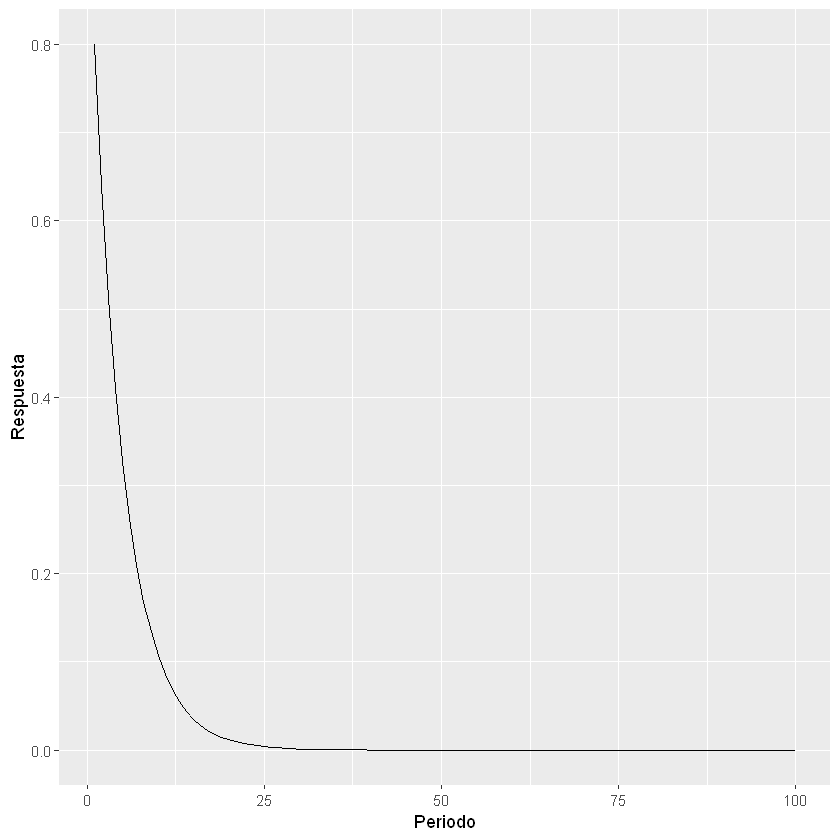

In [118]:
phi <- 0.8
j <- 1:100
x <- phi ^ j
datos <- data.frame(Periodo = j, Respuesta = x)
g <- ggplot(data = datos, aes(x = Periodo, y = Respuesta))
g + geom_line()

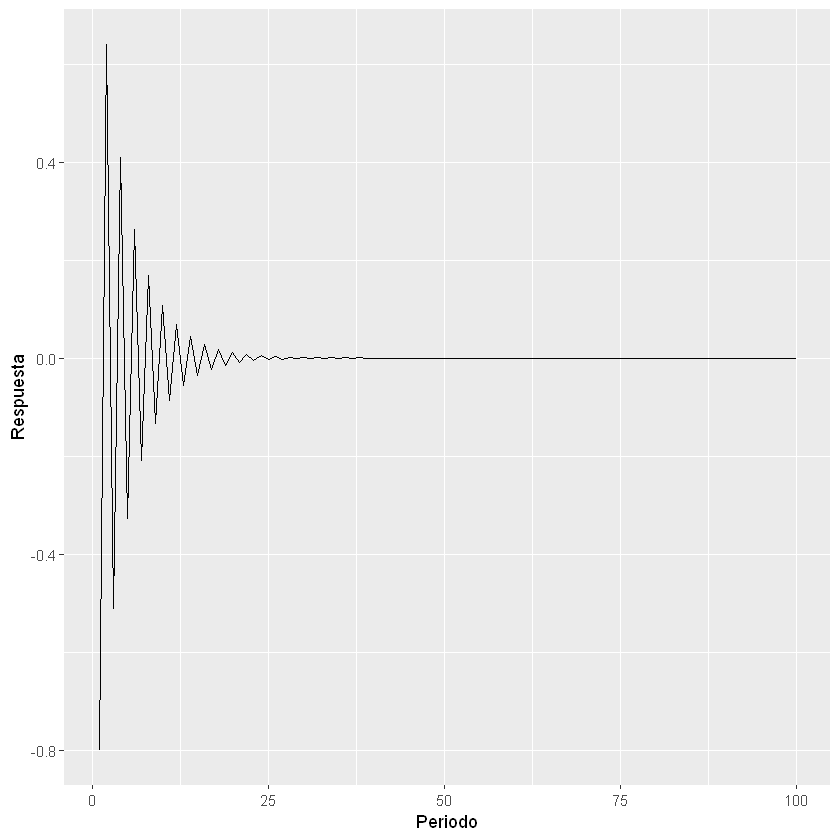

In [119]:
phi <- -0.8
j <- 1:100
x <- phi ^ j
datos <- data.frame(Periodo = j, Respuesta = x)
g <- ggplot(data = datos, aes(x = Periodo, y = Respuesta))
g + geom_line()

Analogamente para el caso de las **ecuaciones en diferencias de orden p**, la función impulso - respuesta viene dada por:

$$ \frac{\partial y_{t + j}}{\partial w_t} = f_{11}^{(j)} $$

es el primer elemento de la matriz $F^j$. En Hamilton(1994) puede verse que:

$$ \frac{\partial y_{t + j}}{\partial w_t} = c_1 \lambda_1^j + c_2 \lambda_2^j + \dots + c_p \lambda_p^j $$

donde $c_i = \frac{\lambda_i^{p - 1}}{\prod_{k = 1, k \neq i}^{p}(\lambda_i - \lambda_k)}$.

Si todos los autovalores están dentro del círculo unitario, la solución es estable y la función impulso - respuesta tiende a desvanecerse en el tiempo.

## 2. Operadores de rezago

Un operador solamente transforma una serie de tiempo en otra serie de tiempo. En este caso particular, el operador de rezago, como su nombre lo dice, transforma una serie de tiempo en su pasado inmediato, el periodo anterior. Es decir:

$$ Lx_t = x_{t - 1} $$

Podemos utilizar el operador de rezago para hallar la solución de una ecuación en diferencia. Tomemos el caso de la siguiente **ecuación en diferencias de primer orden**:

$$ y_{t + j} = \phi y_{t + j - 1} + w_{t + j} $$

podemos reescribir la ecuación como:

$$ (1 - \phi L)y_{t + j} = w_{t + j} $$

teniendo en cuenta que contamos con la informacion de $y_{t - 1}$ y de todos los $w_{t + j}$ para $j = 0, 1, \dots$. Podemos multiplicar ambos lados de la ecuación por $(1 + \phi L + \phi^2 L^2 + \dots + \phi^j L^j)$. Entonces:

$$ (1 - \phi^{j + 1} L^{j + 1})y_{t + j} = (1 + \phi L + \phi^2 L^2 + \dots + \phi^j L^j)w_{t + j} $$

$$ y_{t + j} = \phi^{j + 1}y_{t - 1} + \phi^j w_t + \phi^{j - 1}w_{t + 1} + \dots + w_{t + j} $$

que es la misma solución obtenida en la sección anterior para el caso de una **ecuación en diferencia de primer orden**.

Los operadores de rezago no solo son útiles para hallar soluciones a ecuaciones en diferencia sino tambien para determinar la estabilidad de las mismas.

Tomemos el caso de la **ecuación en diferencias de orden p**:

$$ y_t = \phi_1 y_{t - 1} + \phi_2 y_{t - 2} + \dots + \phi_p y_{t - p} + w_{t} $$

podemos reescribir la ecuación como:

$$ (1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p) y_t = w_t $$

El término en la izquierda puede ser reescrito como:

$$ (1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p) = (1 - \lambda_1 z)(1 - \lambda_2 z) \dots (1 - \lambda_p z) $$

Este polinomio se lo conoce como **el polinomio característico** y las raíces del mismo son $z_i = \lambda^{-1}_i$. Es decir, son la inversa de los autovalores de la matriz $F$ vista en la sección anterior. 

Concluímos en la sección anterior que la estabilidad de una **ecuación en diferencia de orden p** era garantizada si todos los autovalores de la matriz $F$ están dentro del círculo unitario. Con el uso de los operadores de rezago, concluimos que la estabilidad está garantizada si todas las raíces del **polinomio característico** están fuera del círculo unitario.

Cualquier afirmación es equivalente.

## 3. Modelos Estacionarios ARMA

Hemos mencionado que un proceso estocástico no es más que una sucesión de variables aleatorias indexadas al tiempo:

$$Y_{-\infty}, \dots, Y_{-1}, Y_{0}, Y_{1}, \dots, Y_{\infty}$$

y una serie de tiempo sería una realización de ese proceso estocástico definido:

$$ y_{-\infty}, \dots, y_{-1}, y_{0}, y_{1}, \dots, y_{\infty}$$

Como un proceso estocástico es un conjunto de variables aleatorias, podemos definir para cada una de ellas los principales momentos. Empecemos con la esperanza, sea la variable aleatoria $Y_t$ perteneciente al proceso estocástico $\{Y_t\}^\infty_{t = -\infty}$. La esperanza vendría definida por:

$$\mu_t = E[Y_t] = \int^\infty_{-\infty}y_t f_{Y_t}(y_t)dy_t$$

donde $f_{Y_t}(y_t)$ es la función de densidad de la variable aleatoria $Y_t$. Imaginemos que contamos con $I$ computadoras que simulan la variable aleatoria $Y_t$ al mismo tiempo. Podríamos estimar la esperanza de la variable aleatoria $Y_t$ a través de:

$$E[Y_t] = \lim_{I \to \infty}\frac{\sum^I_{i = 1}Y^{(i)}_t}{I}$$

Esto se cumple por la Ley de Grandes Números. De igual forma, podríamos definir el segundo momento que es la autocovarianza como:

$$\gamma_{jt} = E[(Y_t - \mu_t)(Y_{t - j} - \mu_{t - j})] = \int^\infty_{-\infty}\int^\infty_{-\infty}\dots\int^\infty_{-\infty}(y_t - \mu_t)(y_{t - j} - \mu_{t - j})f_{Y_t, Y_{t - 1}, \dots, Y_{t - j}}(y_t, y_{t - 1}, \dots, y_{t - j})dy_ydy_{t - 1}\dots dy_{t - j}$$

donde $f_{Y_t, Y_{t - 1}, \dots, Y_{t - j}}(y_t, y_{t - 1}, \dots, y_{t - j})$ es la función de densidad conjunta de las variables aleatorias $Y_t, Y_{t - 1}, \dots, Y_{t - j}$. Se puede definir análogamente a la esperanza un estimador de $\gamma_{jt}$:

$$\gamma_{jt} = \lim_{I \to \infty}\frac{\sum^I_{i = 1}[Y^{(i)}_t - \mu_t][Y^{(i)}_{t - j} - \mu_{t - j}]}{I}$$

Considerando cómo se calcula la autocovarianza, definiríamos a la varianza de la variable aleatoria $Y_t$ como $\gamma_{0t}$. Tomando en cuenta esto, la autocorrelación se definiría como:

$$\rho_{jt} = \frac{\gamma_{jt}}{\gamma_{0t}}$$.

Estos son los principales momentos que se consideran al estudiar las series de tiempo.

### 3.1 Estacionariedad y Ergodicidad

Si ni la esperanza, ni las autocovarianzas definidas anteriormente dependen del tiempo, entonces se dice que la serie de tiempo es estacionaria en el sentido débil. Es decir:

$$E[Y_t] = \mu $$
$$E[(Y_t - \mu)(Y_{t - j} - \mu)] = \gamma_j$$

Ningún momento depende del tiempo. Sólo las autocovarianzas dependen del número de periodos $j$ que separa a las variables aleatorias $Y_t$ y $Y_{t - j}$. Adicionalmente, podemos ver que para una serie de tiempo estacionaria se cumple que:

$$\gamma_j = E[(Y_{t + j} - \mu)(Y_{(t + j) - j} - \mu)] = E[(Y_{t + j} - \mu)(Y_t - \mu)] = \gamma_{-j}$$

Es decir, las autocovarianzas con $j$ periodos hacia adelante o hacia atrás son idénticas.

Hay un concepto de estacionariedad en el sentido fuerte. Esto nos dice que si la función de densidad conjunta $f_{Y_t, Y_{t + j_1}, Y_{t + j_2}, \dots, Y_{t + j_n}}(y_t, y_{t + j_1}, y_{t + j_2}, \dots, y_{t + j_n})$ depende sólo de los intervalos $j_1, j_2, \dots, j_n$ separando las fechas y no así del tiempo $t$; entonces el proceso estocástico es estacionario en el sentido fuerte.

Ahora bien, se había considerado que para calcular la media de una variable aleatoria perteneciente a un proceso estacionario $\{Y_t\}^\infty_{t = -\infty}$ necesitamos $I$ realizaciones de este proceso estocástico; sin embargo, en la práctica sólo se cuenta con una realización finita del proceso estocástico bajo estudio. En este sentido, cabe preguntarse bajo qué condiciones:

$$\frac{\sum^T_{t = 1}y^{(1)}_t}{T} \to E[Y_t]$$

es decir, como podemos asegurar que el simple promedio de la serie de tiempo que consideremos bajo análisis es un buen estimador de la esperanza de la variable aleatoria $Y_t$.

Si se cumple que para el proceso estocástico estacionario (ojo con esto, el proceso estocástico debe ser estacionario en el sentido débil) bajo estudio que:

$$\sum^{}_{j = 0}\gamma_j < \infty$$

entonces el proceso estocástico estacionario es ergódico para la esperanza. Esto quiere decir que podemos usar el simple promedio de la serie de tiempo como un buen estimador de $E[Y_t]$. De igual forma existen condiciones (los interesados pueden ver el Capítulo 7 del libro de Hamilton(1994)) que nos aseguran que:

$$\frac{\sum^T_{t = j + 1}(y^{(1)}_t - \mu)(y^{(1)}_{t - j} - \mu)}{T - j} \to \gamma_j$$

cuando se cumple esto se dice que el proceso estocástico estacionario es ergódico para el segundo momento.

### 3.2 Ruido Blanco

El proceso sobre el cual se construyen los procesos ARMA que veremos es el conocido como ruido blanco $\{\epsilon_t\}^\infty_{t = -\infty}$ que debe cumplir tres condiciones:

1. $E[\epsilon_t] = 0 $.
2. $E[\epsilon^2_t] = \sigma^2$.
3. $E[\epsilon_t \epsilon_{\tau}] = 0$ para $t \neq \tau$

Es decir que el proceso ruido blanco es estacionario con autocovarianzas y autocorrelaciones de 0.

Podemos ver cómo luce un proceso ruido blanco gaussiano.


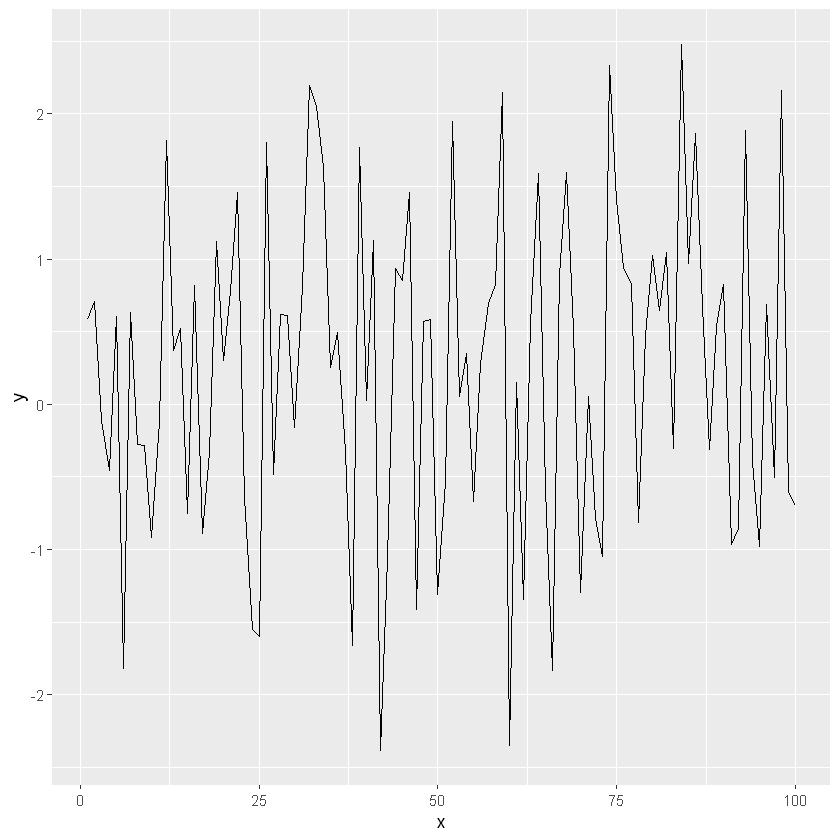

In [120]:
# Generar 100 números aleatorios normales estándar
set.seed(12345)
y <- rnorm(100)
x <- 1:100
datos <- data.frame(y = y, x = x)
g <- ggplot(data = datos, aes(x = x, y = y))
g + geom_line()

### 3.3 Eliminación de tendencia y estacionalidad

Los procesos ARMA que veremos son estacionarios y dos elementos que evitan la estacionariedad de una serie de tiempo son: la tendencia y la estacionalidad. La tendencia puede ser determinística o estocástica. Nos concentraremos en la tendencia determinística y dejaremos la tendencia estocástica para el capítulo de Raiz Unitaria. 

Estos dos componentes de tendencia y estacionalidad están generalmente presentes en las series de datos económicas y deben ser eliminados para poder aplicar la modelación ARMA. Por ejemplo consideremos la serie de Billetes y Monedas que circulan en la economía:

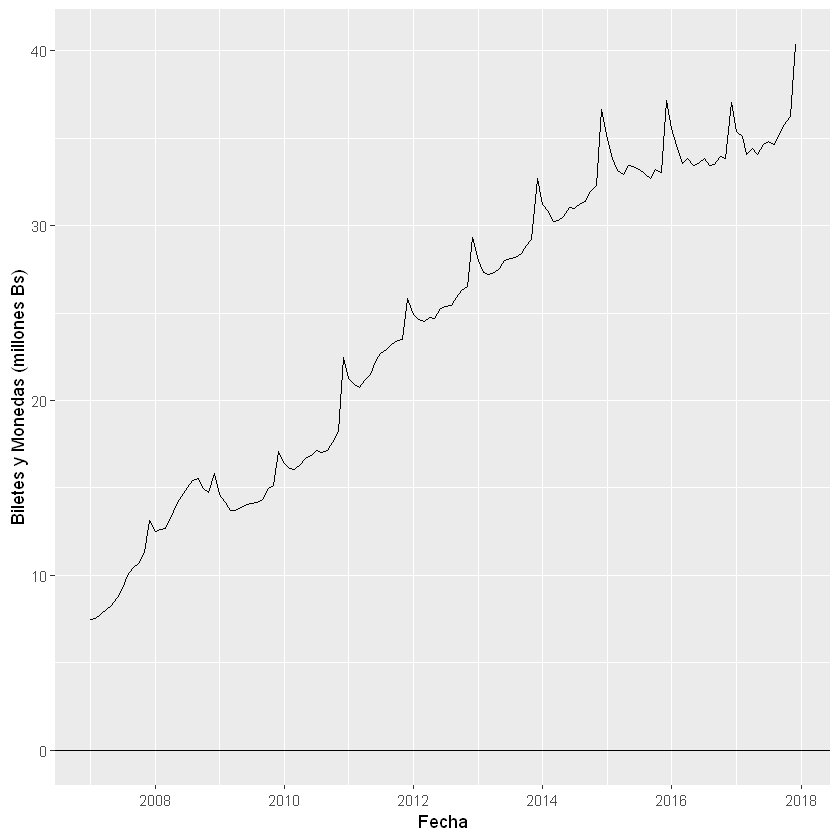

In [121]:
datos <- read.csv("./Datos/billetes.csv") # Se procede a leer los datos
fecha <- as.Date(datos$ï..fecha,"%m/%d/%Y")# Convertir en formato fecha la variable fecha de la base de datos
datos2 <- data.frame(fecha=fecha,bm = datos$BM/1000000)
g <- ggplot(data=datos2,aes(x=fecha, y=bm)) 
g + geom_line() + labs(x="Fecha",y="Biletes y Monedas (millones Bs)") + geom_hline(yintercept=0)

Claramente se observa una tendencia positiva en la serie donde los Billetes y Monedas en circulación en la economía bolivianan han ido de 10 millones de Bs. a más de 40 millones de Bs. en 10 años. Adicionalmente, cada fin de año existen incrementos que se repiten por las fiestas de fin de año. Este es el factor estacional. Para poder modelar la serie de Billetes y Monedas en circulación bajo el enfoque ARMA, es necesario eliminar estos componentes de la serie. En general se tiene que para cualquier serie de tiempo $x_t$:

$$ x_t = m_t + s_t + y_t $$

donde $m_t$ es la tendencia, $s_t$ es el componente estacional y $y_t$ es el residuo estacionario susceptible a ser modelado bajo el enfoque ARMA.

La técnica más elemental y más intuitiva para eliminar la tendencia y la estacionalidad es aplicar el operador diferencia:

1. Para el caso de la tendencia $\Delta x_t = (1 - L)x_t = x_t - x_{t - 1}$.
2. Para el caso de la estacionalidad, sea $d$ el factor de estacionalidad; entonces: $\Delta_d x_t = (1 - L^d)x_t = x_t - x_{t - d}$

Antes de eliminar la tendencia, cabe notar que el gráfico muestra cierta tendencia a incrementarse (mayores oscilaciones). Para facilitar el análisis, realizamos una transformación a los datos aplicando logaritmos `log`.

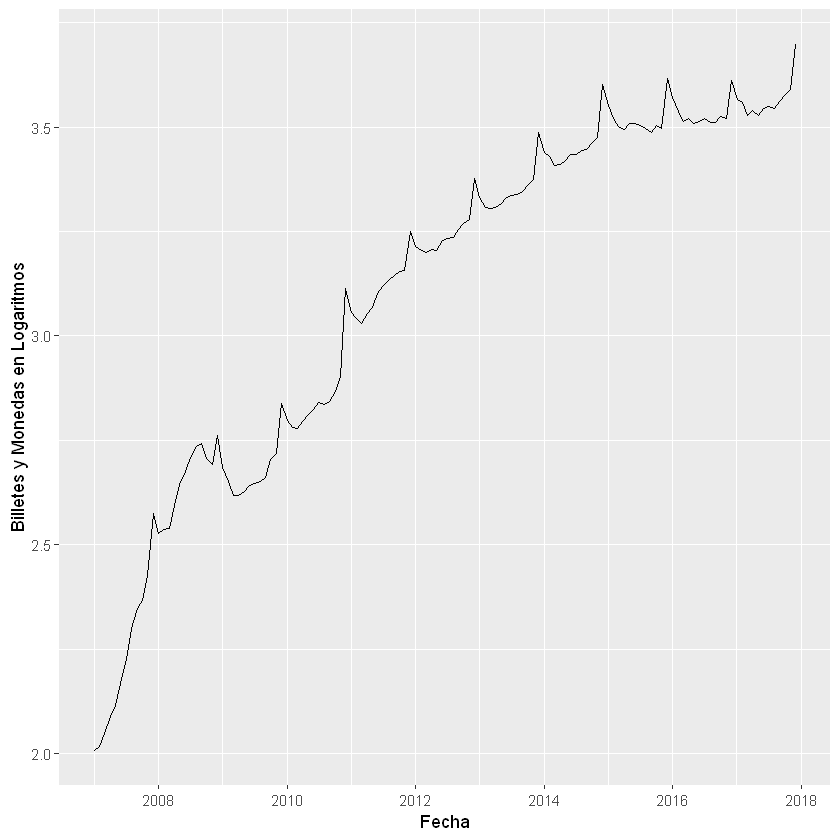

In [122]:
datos2$lbm <- log(datos2$bm)
g <- ggplot(data = datos2, aes(x = fecha, y = lbm))
g + geom_line() + labs(x = "Fecha", y = "Billetes y Monedas en Logaritmos")

Ahora se utiliza el comando `diff` para aplicar el operador diferencia y eliminar la tendencia:

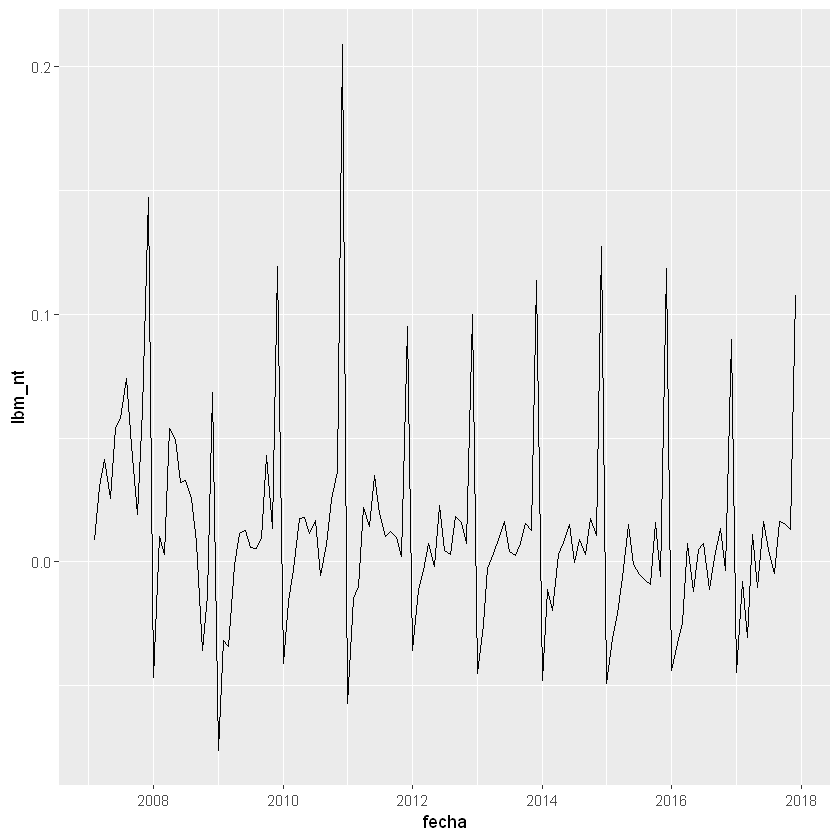

In [123]:
datos2$lbm_nt <- c(NA, diff(datos2$lbm))
n <- length(datos2$lbm)
g <- ggplot(data = datos2[2:n,], aes(x = fecha, y = lbm_nt))
g + geom_line()

Como puede observarse, la tendencia se eliminó de la serie, solamente quedaría el componente estacional. Para ello, aplicamos el comando `diff` con la opcion `lag = 12` (ya que cada 12 meses existe un incremento en los Billetes y Monedas).

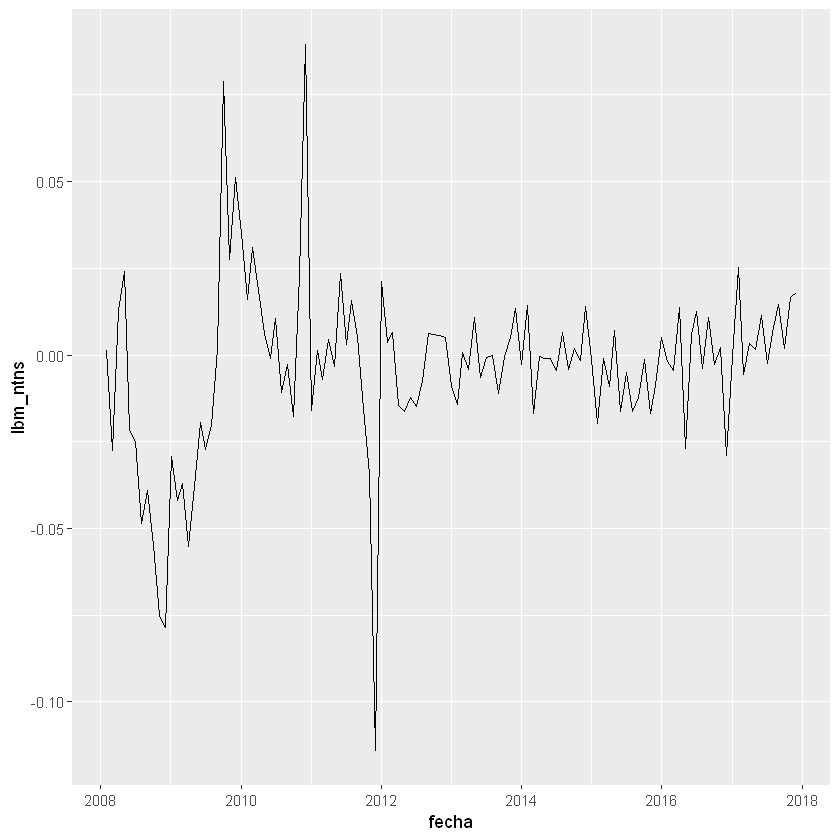

In [124]:
datos2$lbm_ntns <- c(rep(NA, 12), diff(datos2$lbm_nt, lag = 12))
g <- ggplot(data = datos2[14:n,], aes(x = fecha, y = lbm_ntns))
g + geom_line()

Como puede observarse, se ha eliminado el componente estacional de las serie y ahora este residuo es susceptible a ser modelado bajo el enfoque ARMA.

Existe tambien otro método que nos permite extraer los componentes de tendencia y estacionalidad a través del uso de la herramienta de regresión lineal y este método es útil cuando nuestro objetivo es el pronóstico.

En el caso de la tendencia $m_t$, podemos asumir que está descrita por el siguiente polinomio:

$$ m_t = \sum^N_{i = 0}a_i n^i_t $$

donde $n_t$ son generalente las fechas de la serie; entonces el problema se reduce a aplicar OLS a la series de Billetes y Monedas. El modelo sería:

$$ x_t = \sum^N_{i = 0}a_i n^i_t + e_t $$

donde $e_t$ es el término error. Procedemos a estimar el modelo bajo la hipótesis de una tendencia cúbica:

In [125]:
datos2$t <- 1:n
datos2$t2 <- datos2$t^2
datos2$t3 <- datos2$t^3

In [126]:
mt_mod <- lm(lbm ~ t + t2 + t3, data = datos2) 
summary(mt_mod)


Call:
lm(formula = lbm ~ t + t2 + t3, data = datos2)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149172 -0.032502 -0.004588  0.022928  0.189970 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.120e+00  2.630e-02  80.593  < 2e-16 ***
t            2.326e-02  1.706e-03  13.633  < 2e-16 ***
t2          -1.041e-04  2.975e-05  -3.498 0.000645 ***
t3           8.560e-08  1.471e-07   0.582 0.561584    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07342 on 128 degrees of freedom
Multiple R-squared:  0.972,	Adjusted R-squared:  0.9713 
F-statistic:  1481 on 3 and 128 DF,  p-value: < 2.2e-16


Podemos verificar como queda la serie una vez extraida la tendencia:

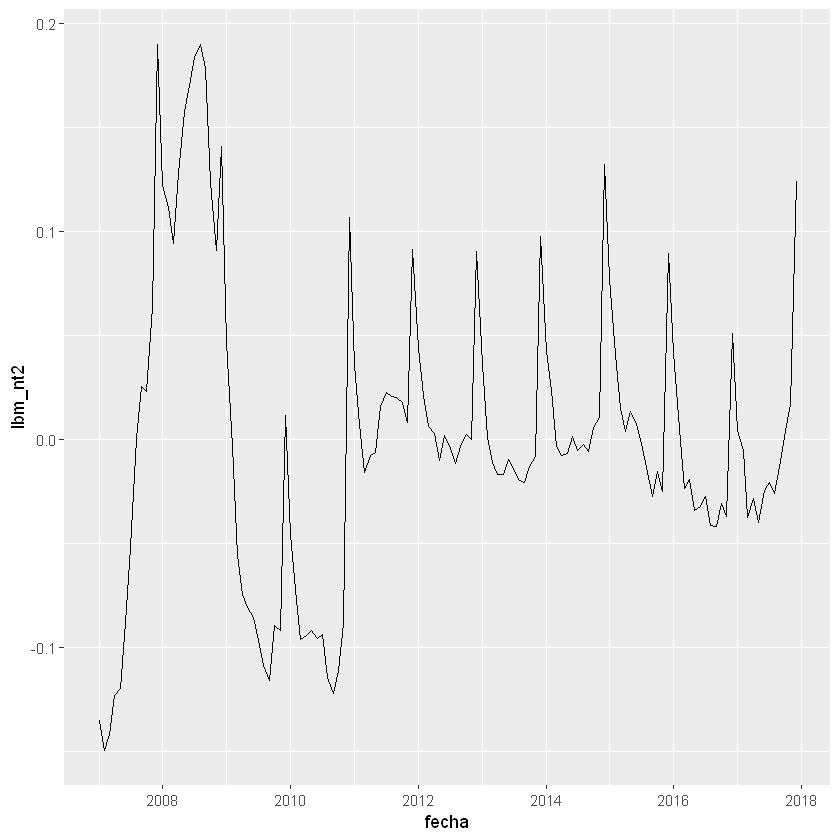

In [127]:
datos2$lbm_nt2 <- mt_mod$residuals
g <- ggplot(data = datos2, aes(x = fecha, y = lbm_nt2))
g + geom_line()

Podemos también graficar la tendencia estimada:

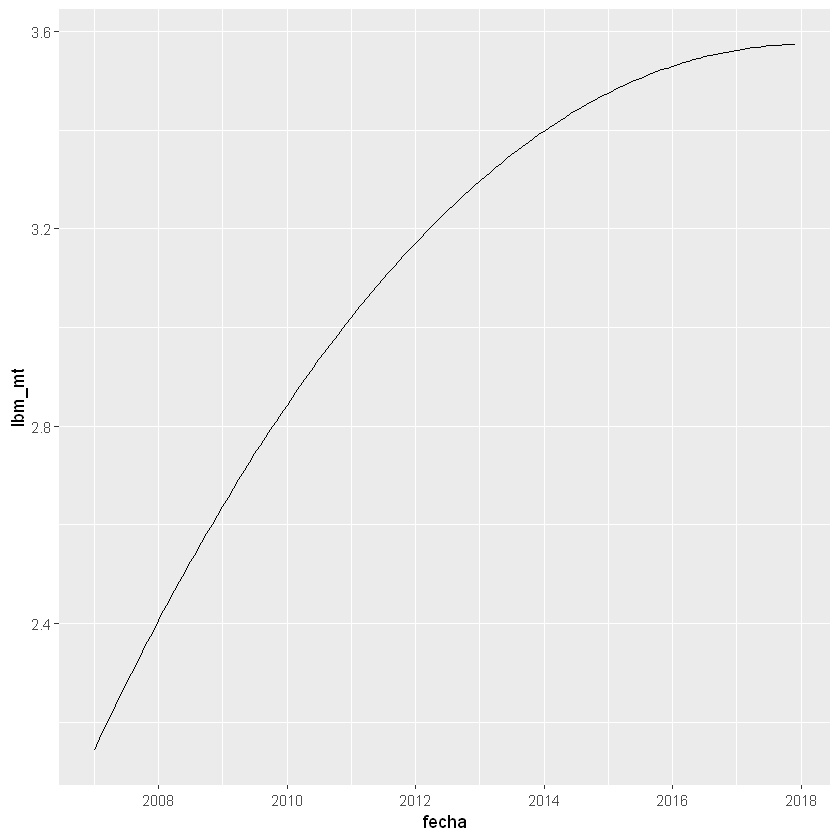

In [128]:
datos2$lbm_mt <- predict(mt_mod)
g <- ggplot(data = datos2, aes(x = fecha, y = lbm_mt))
g + geom_line()

En el caso de la estacionalidad $s_t$ la estimamos a través de la regresión harmónica donde:

$$ s_t = a_0 + \sum^k_{j = 1}(a_j \cos(2\pi \omega_j t) + b_j\sin(2\pi \omega_j t))$$

donde $\omega_j$ es la fracción del ciclo que se completa en una unidad de tiempo y $-0.5 < \omega_j \leq 0.5$. Se la conoce como frecuencia. Definidas las frecuencias $\omega_j$, es posible estimar el modelo a través de OLS:

$$ x_t = a_0 + \sum^k_{j = 1}(a_j \cos(2\pi \omega_j t) + b_j\sin(2\pi \omega_j t)) + e_t $$

donde $e_t$ es el termino error. Cabe mencionar que la $x_t$ considerarda excluye ya el componente tendencia $m_t$.

Procedemos a estimar el componente estacional. Para ello requerimos definir las frecuencias $\omega_j$ requeridas. Esto lo hacemos con la ayuda del periodograma (en qué consiste el periodograma lo veremos en el capítulo de Análisis Espectral). 

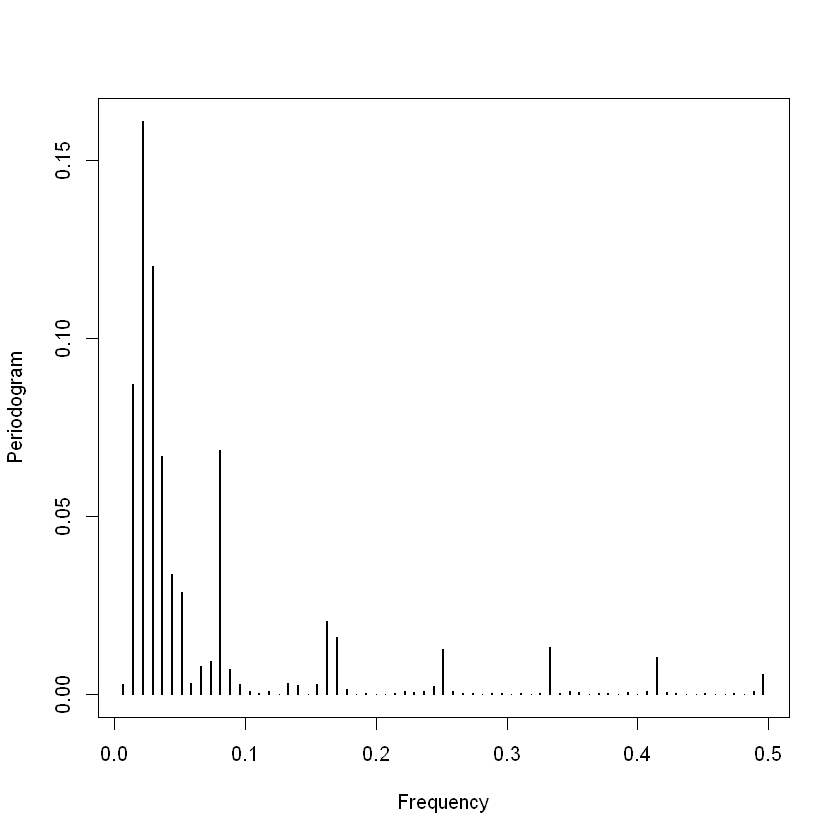

In [129]:
# Intalamos el paquete requerido 
# install.packages("TSA")
library(TSA)
period <- periodogram(datos2$lbm_nt2)

In [130]:
period_datos <- data.frame(freq = period$freq, spec = period$spec)
head(period_datos,40)

freq,spec
0.007407407,2.737966e-03
0.014814815,8.703495e-02
0.022222222,1.609705e-01
0.029629630,1.203366e-01
0.037037037,6.686480e-02
0.044444444,3.382361e-02
0.051851852,2.873166e-02
0.059259259,3.128557e-03
0.066666667,8.035796e-03
0.074074074,9.324148e-03


In [131]:
n * c(0.02, 0.09, 0.17, 0.25)

[1]  2.64 11.88 22.44 33.00

Hay un ciclo corto de 2 meses, pero hay ciclos periódicos de 11, 22 y 33 meses y asi sucesivamente hasta completar la muestra.

In [132]:
omega_j <- c(0.02, 11 * (1:(n %/% 22)) / n)

In [133]:
m <- ncol(datos2)
for (i in 1:length(omega_j)) {
     datos2[, m + i] <- cos(2*pi*omega_j[i]*datos2$t)
}

In [134]:
colnames(datos2)[11:17] <- paste(rep("W", 7), 1:7, sep = "")

In [135]:
m <- ncol(datos2)
for (i in 1:length(omega_j)) {
    datos2[, m + i] <- sin(2*pi*omega_j[i]*datos2$t)
}

In [136]:
colnames(datos2)[18:24] <- paste(rep("Z", 7), 1:7, sep = "")

In [137]:
st_mod <- lm(lbm_nt2 ~ W1 + W2 + W3 + W4 + W5 + W6 + W7 + Z1 + Z2 + Z3 + Z4 + Z5 + Z6 + Z7, data = datos2)
summary(st_mod)


Call:
lm(formula = lbm_nt2 ~ W1 + W2 + W3 + W4 + W5 + W6 + W7 + Z1 + 
    Z2 + Z3 + Z4 + Z5 + Z6 + Z7, data = datos2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14017 -0.03680 -0.00701  0.03643  0.16885 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.462e-03  5.415e-03  -0.824 0.411547    
W1          -1.956e-02  7.516e-03  -2.602 0.010471 *  
W2           2.892e-02  7.564e-03   3.823 0.000213 ***
W3           2.360e-02  7.563e-03   3.120 0.002278 ** 
W4           1.530e-02  7.553e-03   2.025 0.045127 *  
W5           1.363e-02  7.553e-03   1.804 0.073793 .  
W6           1.386e-02  7.554e-03   1.834 0.069168 .  
W7           8.512e-03  6.506e-03   1.308 0.193333    
Z1           3.632e-02  7.745e-03   4.689 7.48e-06 ***
Z2          -1.248e-03  7.563e-03  -0.165 0.869215    
Z3           8.118e-03  7.581e-03   1.071 0.286419    
Z4           5.220e-03  7.602e-03   0.687 0.493637    
Z5           3.869e-03  7.568e-03   0.511 0.610

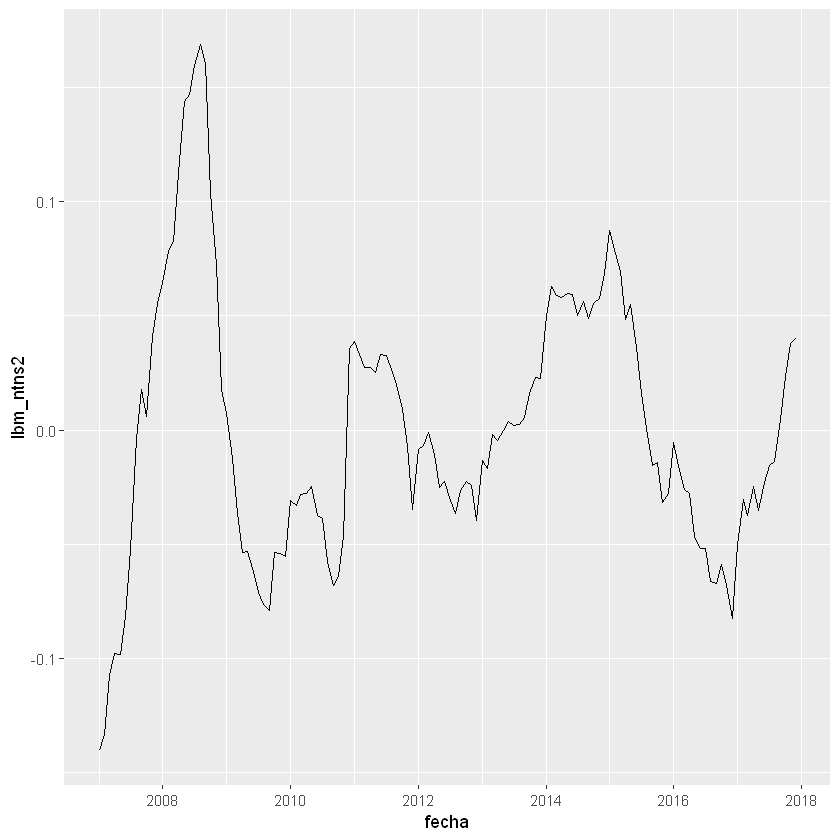

In [138]:
datos2$lbm_ntns2 <- st_mod$residuals
g <- ggplot(data = datos2, aes(x = fecha, y = lbm_ntns2))
g + geom_line()

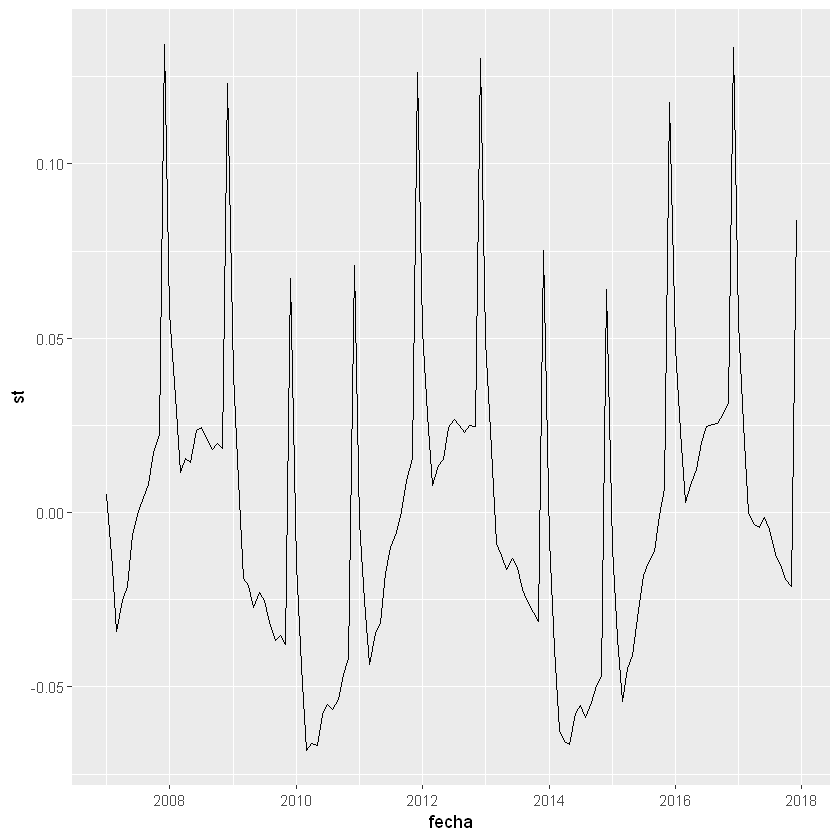

In [139]:
datos2$st <- predict(st_mod)
g <- ggplot(data = datos2, aes(x = fecha, y = st))
g + geom_line()

Warning message:
"Removed 13 row(s) containing missing values (geom_path)."

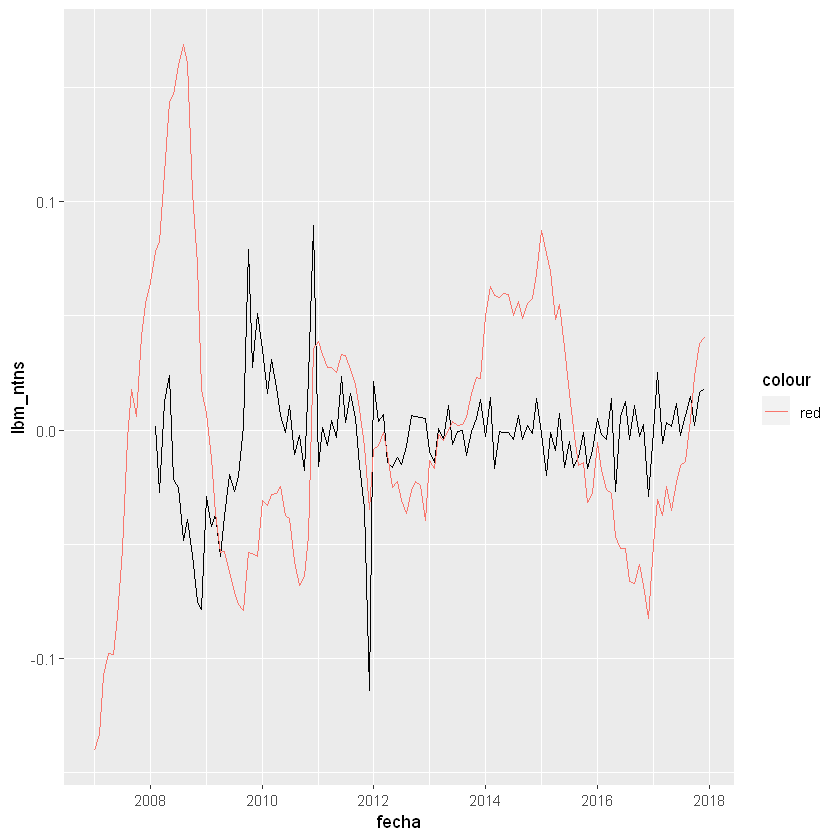

In [140]:
g <- ggplot(data = datos2, aes(x = fecha))
g + geom_line(aes(y = lbm_ntns)) + geom_line(aes(y = lbm_ntns2, color = "red"))

Existe un tercer método para extraer el componente de tendencia y estacionalidad de una serie de tiempo y es a través del método LOESS que estima varias regresiones móviles de la serie de tiempo de acuerdo a una ventana de datos establecida. Es parecido a una media móvil solo que se utiliza regresiones. En `R` ya viene implementado este método a través de la función `stl`. El método puede verse [aqui](https://www.scb.se/contentassets/ca21efb41fee47d293bbee5bf7be7fb3/stl-a-seasonal-trend-decomposition-procedure-based-on-loess.pdf).

Primero que nada, tenemos que definir nuestra serie de tiempo como un objeto `ts`:

In [141]:
lbm <- ts(datos2$lbm, start = c(2007, 1), end = c(2017, 12), frequency = 12)

Luego, utilizaremos 15 datos en las ventánas móviles para las regresiones móviles del componente tendencia y el componente estacional (según el paper debería ser un número impar). Luego utilizaremos un polinomio de grado 1 para cada ventana (la función nos permite polinomios de grado 0 o 1).

In [142]:
decomp <- stl(lbm, s.window = 15, t.window = 15, s.degree = 1, t.degree = 1)

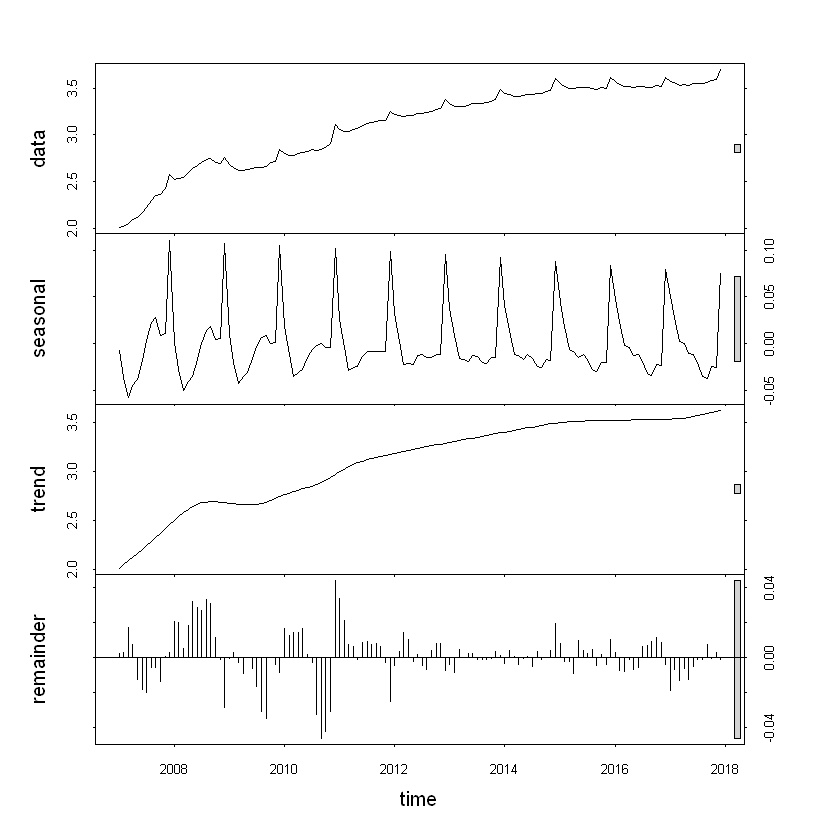

In [143]:
plot(decomp)

### 3.4 Funciones de Autocorrelación y Autocorrelación Parcial (ACF y PACF)

Habíamos mencionado que la estimación de los momentos de una serie de tiempo son muy importantes y básicamente nos ayudan a identificar si la serie de tiempo es estacionaria o no. 

En el caso de los modelos ARMA, hay dos funciones que nos ayudan a identificar el orden de nuestro modelo ARMA. Éstas son: la Función de Autocorrelación (ACF) y la Función de Autocorrelación Parcial (PACF). En el primer caso, se define que la estimación de la autocorrelación $j$ de una serie de tiempo estacionaria viene dada por:

$$\hat{\rho}_j = \frac{\hat{\gamma}_j}{\hat{\gamma}_0} $$

donde:

$$\hat{\gamma}_j = \frac{1}{T}\sum^T_{t = j + 1}(y_t - \bar{y})(y_{t - j} - \bar{y})$$
$$\bar{y} = \frac{1}{T}\sum^T_{t = 1}y_t$$

Se parte de la Hipótesis Nula $H_0$ que la serie de tiempo es ruido blanco. Si ello fuera cierto, entonces todas sus autocorrelaciones $\hat{\rho}_j$ deberían ser 0. Adicionalmente $Var(\hat{\rho}_j) = \frac{1}{T}$ para una serie de tiempo ruido blanco; entonces, nuestra región de aceptación de $H_0$ con un 95% de probabilidad es $\pm 1.96 \frac{1}{\sqrt{T}}$. La ACF es útil para determinar el componente MA de los modelos ARMA.

Por otro lado, la n-ésima autocorrelción parcial está definida como el último coeficiente de una regresión de $y_t$ y sus $n$ valores más recientes:

$$y_t = c + \alpha^{(n)}_1 y_{t - 1} + \alpha^{(n)}_2 y_{t - 2} + \dots + \alpha^{(n)}_n y_{t - n} + e_t$$

Suponiendo que la serie de tiempo haya sido generada por un proceso AR(p)(veremos más adelante este proceso) y si $n > p$ entonces $\alpha^{(n)}_n = 0$ y todos los coeficientes de la regresion mayores a $p$. Por lo tanto, la hipótesis nula de la PACF es que la serie de tiempo no sigue un proceso AR(p) para $p = 1, \dots, n$ donde $Var(\hat{\alpha}^{(p)}_p) = \frac{1}{T}$; entonces nuestra región de aceptación de $H_0$ es de $\pm 1.96 \frac{1}{\sqrt{T}}$. Como se observa, la PACF es útil para determinar el componente AR en los modelos ARMA. 

### 3.5 Modelo MA(1)

El modelo MA(1) se define como:

$$Y_t = \mu + \epsilon_t + \theta \epsilon_{t - 1}$$

donde $\epsilon_t$ es un proceso ruido blanco y $\mu \in R$ y $\theta \in R$. Este proceso es estacionario:

1. $E[Y_t] = \mu$
2. $\gamma_0 = (1 + \theta^2)\sigma^2$
3. $\gamma_1 = \theta \sigma^2$
4. $\gamma_j = 0$ para $j \geq 2$

Entonces el proceso MA(1) se caracteriza por que las autocorrelaciones son diferentes a 0 hasta el primer rezagos. Para rezagos mayores o iguales que 2, estas autocrorrelaciones son 0.

Podemos ilustrar esto con un ejemplo. Sea el proceso MA(1):

$$ Y_t = 1.5 + \epsilon_t + 0.8 \epsilon_{t - 1} $$

donde $\epsilon_t$ es ruido blanco gaussiano.

In [144]:
set.seed(12345)
epsilon <- rnorm(101)
y <- rep(0, 101)
for (i in 2:101) {
    y[i] <- 1.5 + epsilon[i] + 0.8 * epsilon[i - 1]  
}

Así luciría esta serie de tiempo:

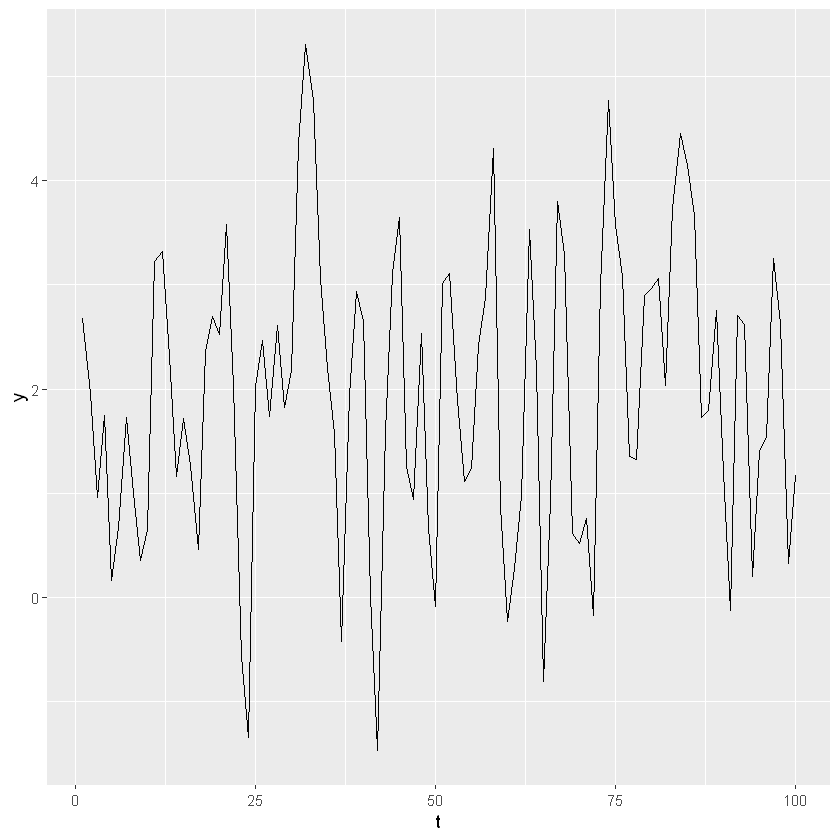

In [145]:
ma1_datos <- data.frame(t = 1:100, y = y[2:101])
g <- ggplot(data = ma1_datos, aes(x = t, y = y))
g + geom_line()

Así luciría la ACF:

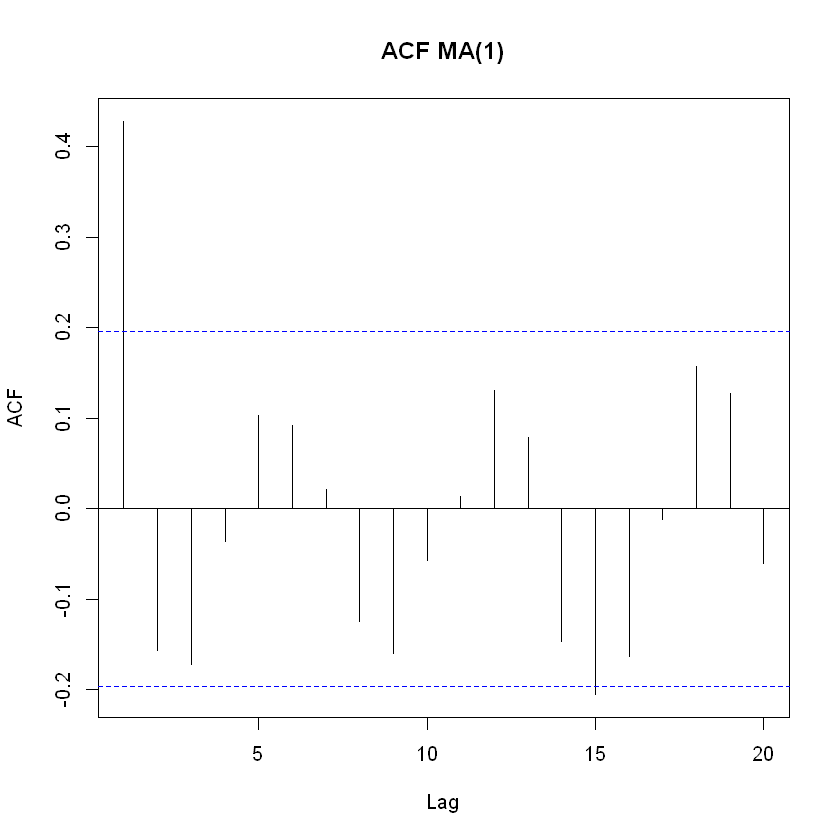

In [146]:
acf(ma1_datos$y, lag.max = 20, main = "ACF MA(1)")

Puede verse claramente que la primera autocorrelación es distinta de 0, como lo sugiere la teoría. 

### 3.6 Modelo MA(q)

El proceso MA(q) viene dado por:

$$ Y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q} $$

donde $\epsilon_t$ es un proceso ruido blanco y $\mu, \theta_1, \theta_2, \dots, \theta_q \in R$. Este proceso es estacionario ya que:

1. $E[Y_t] = 0$
2. $\gamma_0 = (1 + \theta^2_1 + \theta^2_2 + \dots + \theta^2_q)\sigma^2$
3. $\gamma_j = (\theta_j + \theta_{j + 1}\theta_1 + \theta_{j + 2}\theta_2 + \dots + \theta_q\theta_{q-j})\sigma^2$ para $j = 1, 2, \dots, q$
4. $\gamma_j = 0$ para $j > q$

La característica esencial del proceso MA(q) es que sus autocorrelaciones son 0 para rezagos $j > q$. Podemos ilustrar todo esto con un MA(3):

$$ Y_t = 2.3 + \epsilon_t + 1.3 \epsilon_{t - 1} + 0.1 \epsilon_{t - 2} - 3.6 \epsilon_{t - 3} $$

donde $\epsilon_t$ es un proceso ruido balnco gaussiano.

In [147]:
set.seed(12345)
epsilon <- rnorm(103)
y <- rep(0, 103)
for (i in 4:103) {
    y[i] <- 2.3 + epsilon[i] + 1.3 * epsilon[i - 1] + 0.1 * epsilon[i - 2] - 3.6 * epsilon[i - 3]
}

Asi luciría esta serie de tiempo:

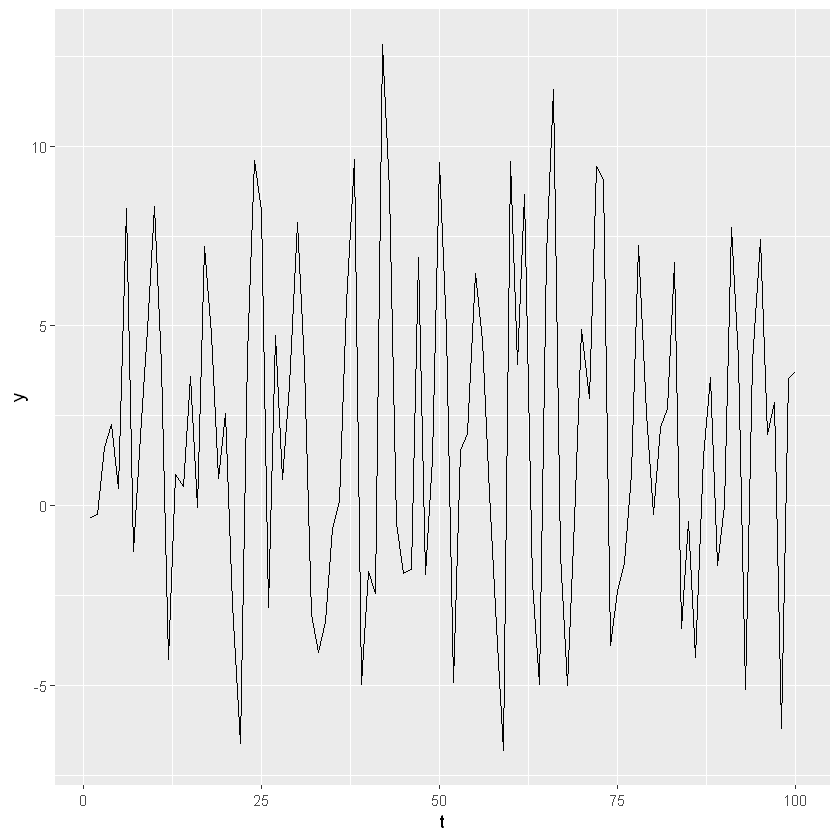

In [148]:
ma3_datos <- data.frame(t = 1:100, y = y[4:103])
g <- ggplot(data = ma3_datos, aes(x = t, y = y))
g + geom_line()

Y así luciría la ACF:

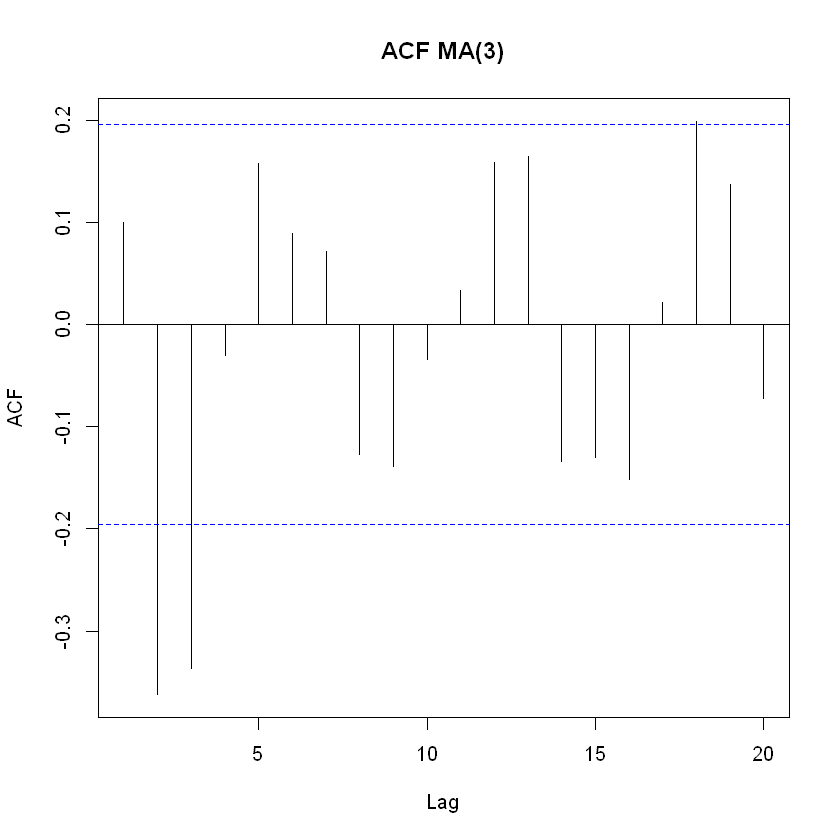

In [149]:
acf(ma3_datos$y, lag.max = 20, main = "ACF MA(3)")

Si bien parece que la primero autocorrelación es 0, la segunda y la tercera son distintas de 0. Autocorrelaciones mayores son iguales a 0.

### 3.7 Modelo MA($\infty$)

El proceso MA($\infty$) es:

$$Y_t = \mu + \sum^\infty_{j = 0}\psi_j\epsilon_{t - j} = \mu + \psi_0 \epsilon_t + \psi_1 \epsilon_{t - 1} + \psi_2 \epsilon_{t - 2} + \dots $$

Este proceso es estacionario siempre y cuando se cumpla que:

$$\sum^\infty_{j = 0}|\psi_j| < \infty$$

es decir, que los coeficientes del proceso MA($\infty$) sean sumables en términos absolutos.

La utilidad de este proceso se encuentra en el Teorema de descomposición de Wold, que dice que cualquier serie de tiempo estacionaria con media 0 puede se representada de la siguiente forma:

$$Y_t = \sum^\infty_{j = 0}\psi_j \epsilon_{t - j} + \kappa_t$$

donde $\psi_0 = 1$ y $\sum^\infty_{j = 0}\psi^2_j < \infty$ (esto implica que $\sum^\infty_{j = 0}|\psi_j| < \infty$). El proceso $\epsilon_t$ es ruido blanco y es el resultado del error en el pronóstico de $Y_t$:

$$ \epsilon_t = Y_t - \hat{E}(Y_t|Y_{t - 1}, Y_{t - 2}, \dots) $$

El valos de $\kappa_t$ no está correlacionado con $\epsilon_{t - j}$ para ningún $j$; sin embargo, $\kappa_t$ puede ser pronosticado con buena exactitud a través de una función lineal de valores pasados de $Y$:

$$ \kappa_t = \hat{E}(\kappa_t|Y_{t - 1}, Y_{t - 2}, \dots) $$

Veremos que todos los modelos ARMA cumplen con la representación de Wold.

### 3.8 Modelo AR(1)

Consideremos el siguiente proceso AR(1):

$$Y_t = c + \phi Y_{t - 1} + \epsilon_t$$

donde $\epsilon_t$ es un proceso ruido blanco. Este modelo nos hace recuerdo a la ecuación en diferencia de primer orden $y_t = \phi y_{t - 1} + w_t$ donde se dijo que la solución es estable si $|\phi| < 1$. Esta misma condición garantiza para el caso del modelo AR(1) la estacionariedad. Podemos reescribir este proceso como:

$$(1 - \phi L)Y_t = c + \epsilon_t$$

si se cumple que $|\phi| < 1$ entonces podemos dividir el proceso por $(1 - \phi L)$:

$$Y_t = \frac{c}{1 - \phi} + \sum^\infty_{j = 0}\phi^j \epsilon_{t - j}$$

como podemos ver el proceso AR(1) puede ser representado por un proceso MA($\infty$). Adicionalmente si $|\phi| < 1$, entonces $\sum^\infty_{j = 0}|\phi|^j < \infty$ lo cual garantiza la estacionariedad de proceso AR(1).

Los momentos del modelo AR(1) estacionario son:

1. $E[Y_t] = \frac{c}{1 - \phi}$
2. $\gamma_0 = \frac{\sigma^2}{1 - \phi^2}$
3. $\gamma_j = \left(\frac{\phi^j}{1 - \phi^2}\right)\sigma^2$
4. $\rho_j = \phi^j$

Entonces la caracteristica de la ACF de un proceso AR(1) es que tiende a 0 a medida que $j \to \infty$. Adicionalmente, la PACF debería mostrar la autocorrelación parcial al primer rezago distinta de 0 y las demas iguales a 0. Revisaremos todo esto con un ejemplo.

Sea el siguiente proceso AR(1):

$$ Y_t = 1.3 - 0.6 Y_{t - 1} + \epsilon_t $$

donde $\epsilon_t$ es ruido blanco gaussiano. Podemos observar que se cumple que $|-0.6| < 1$; por lo tanto el proceso es estacionario.

In [150]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    y[i] <- 1.3 - 0.8 * y[i - 1] + epsilon[i]
}

La serie de tiempo luciría como:

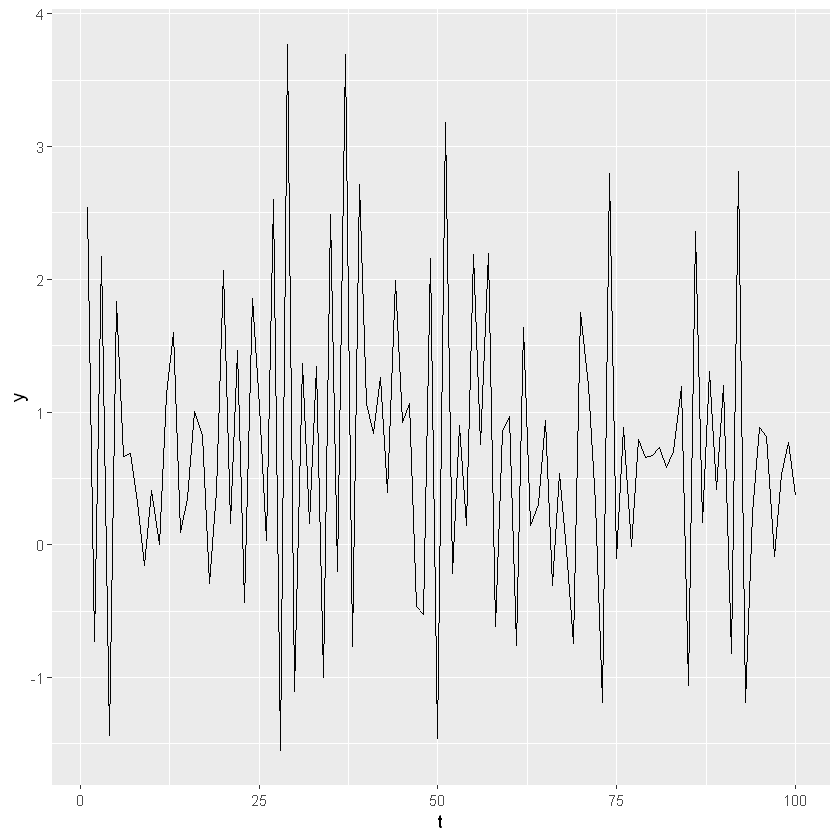

In [151]:
ar1_datos <- data.frame(t = 1:100, y = y[401:500])
g <- ggplot(data = ar1_datos, aes(x = t, y = y))
g + geom_line()

Las ACF y PACF lucirian asi:

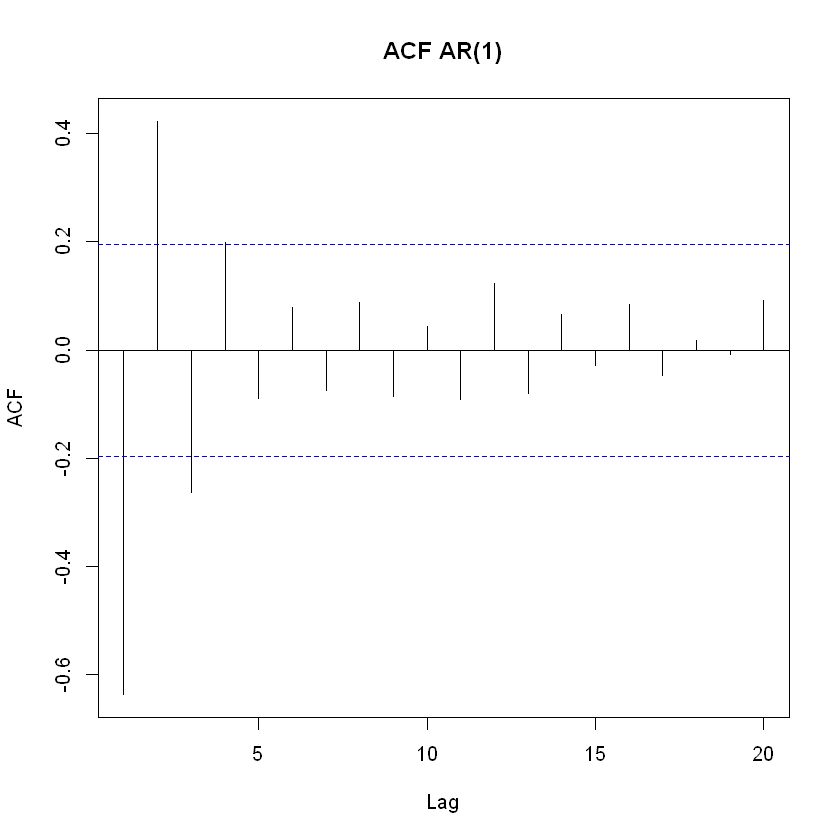

In [152]:
acf(ar1_datos$y, lag.max = 20, main = "ACF AR(1)")

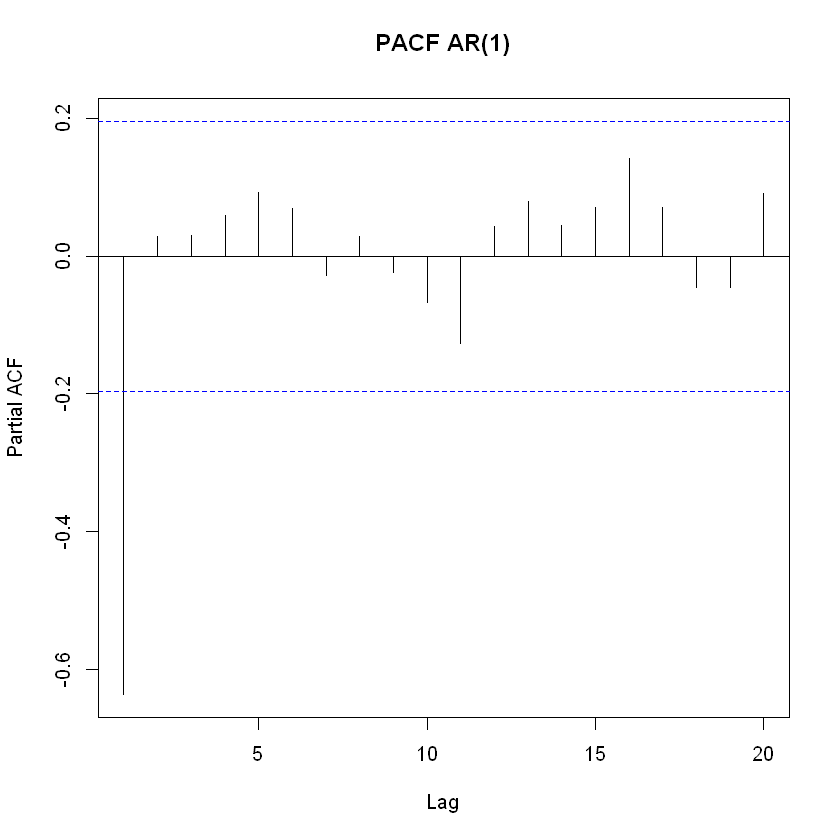

In [153]:
pacf(ar1_datos$y, lag.max = 20, main = "PACF AR(1)")

Como puede observarse, las ACF va decayendo gradualmente a medida que los rezagos aumentan y en el caso de la PACF solamente la primera autocorrelación parcial es distinta de 0 como se esperaba.

### 3.9 Modelo AR(p)

El proceso AR(p) viene dado por:

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t$$

que puede ser reescrito de la siguiente forma:

$$(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p) Y_t = c + \epsilon_t$$

de acuerdo a lo expuesto en las ecuaciones en diferencias de orden p, llamamos a $(1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p)$ el polinomio característico y dijimos que la solución es estable si las raíces de este polinomio están fuera del círculo unitario. De igual forma, en el caso del proceso AR(p), éste es estacionario si las raices del polinomio característico están fuera del círculo unitario. Si se cumple esto, entonces podemos dividir el proceso AR(p) por $(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)$ con lo que obtenemos un proceso MA($\infty$):

$$Y_t = \frac{c}{1 - \phi_1 - \phi_2 - \dots - \phi_p} + \sum^\infty_{j = 0}\psi_j \epsilon_{t - j}$$

si las raices del polinomio característico están fuera del círculo unitario, entonces $\sum^\infty_{j = 0}|\psi_j| < \infty$ por lo que el proceso es estacionario.

Los momentos del proceso AR(p) son:

1. $E[Y_t] = \frac{c}{1 - \phi_1 - \phi_2 - \dots - \phi_p}$
2. $\gamma_0 = \phi_1 \gamma_1 + \phi_2 \gamma_2 + \dots + \phi_p \gamma_p + \sigma^2$
3. $\gamma_j = \phi_1 \gamma_{j - 1} + \phi_2 \gamma_{j - 2} + \dots + \phi_p \gamma_{j - p}$ para $j = 1, 2, \dots$
4. $\rho_j = \phi_1 \rho_{j - 1} + \phi_2 \rho_{j - 2} + \dots + \phi_p \rho_{j - p}$ para $j = 1, 2, \dots$.

A las ecuaciones que representan $\rho_j$ se las conoce como las ecuaciones *Yule - Walker*.

En cuanto a la PACF, nos mostraría que las autocorrelaciones parciales hasta el rezago p son distintas de cero y mayores que el rezago p son iguales a 0. Veremos todo esto con un proceso AR(2).

Sea el siguiente proceso AR(2):

$$Y_t = 1.1 Y_{t - 1} - 0.18 Y_{t - 2} + \epsilon_t$$

Primero verificaremos si el proceso es estacionario con las raices del polinomio característico $1 - 1.1z + 0.18z^2$.

In [154]:
polyroot(c(1, -1.1, 0.18))

[1] 1.111111+0i 5.000000-0i

Entonces ambas raíces están fuera del círculo unitario por lo que el proceso AR(2) es estacionario.

In [155]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1; y[2] <- 2
for (i in 3:500) {
    y[i] <- 1.1 * y[i - 1] - 0.18 * y[i - 2] + epsilon[i]
}

El proceso AR(2) luciría así:

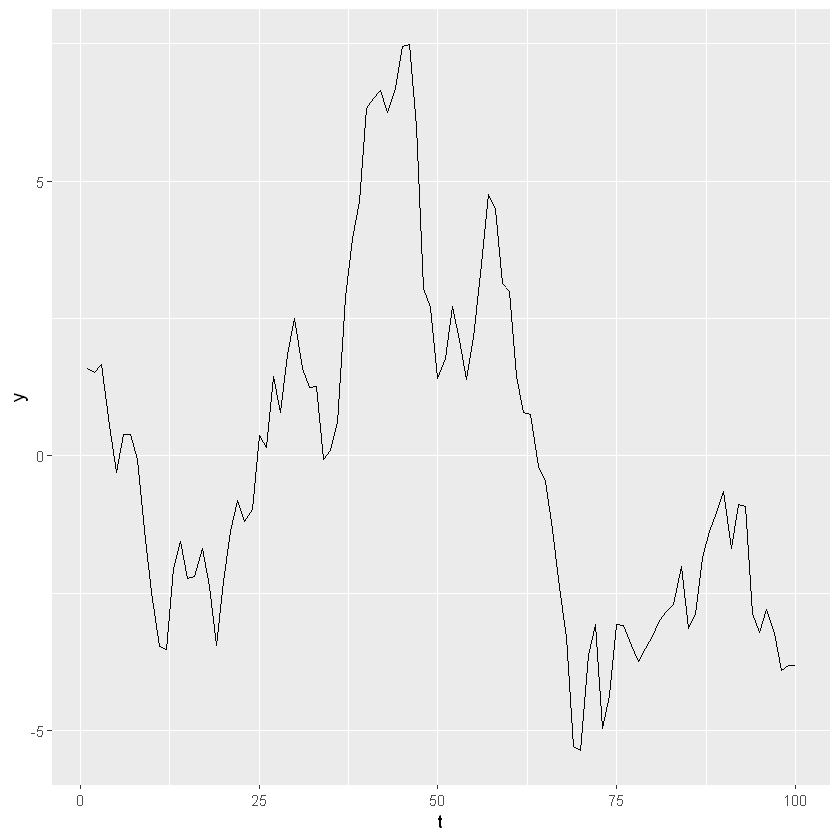

In [156]:
ar2_datos <- data.frame(t = 1:100, y = y[401:500])
g <- ggplot(data = ar2_datos, aes(x = t, y = y))
g + geom_line()

La PACF luciría así:

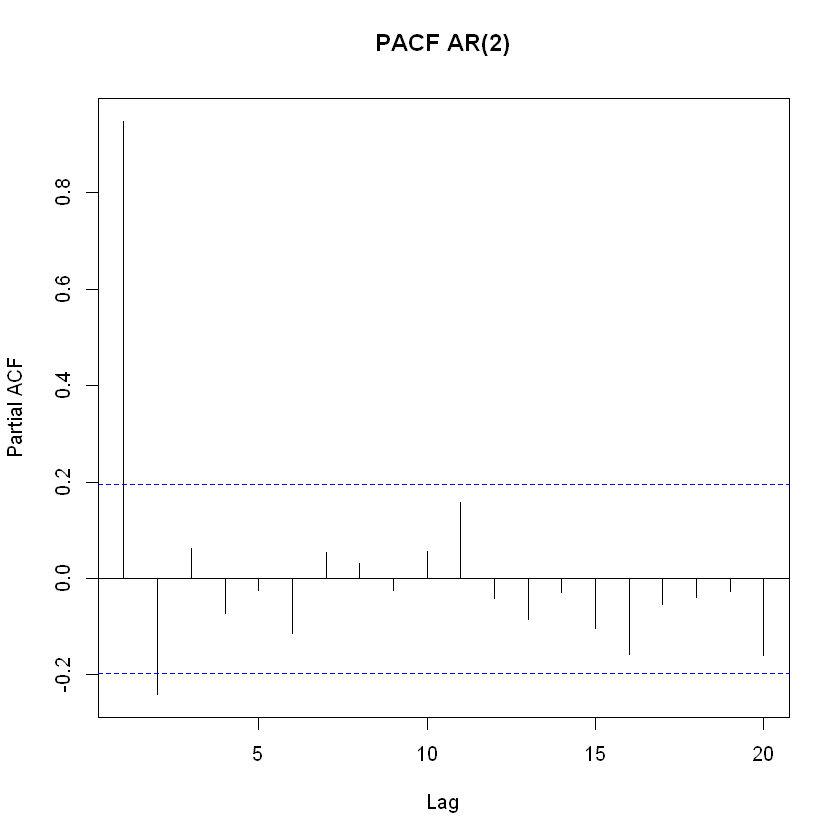

In [157]:
pacf(ar2_datos$y, lag.max = 20, main = "PACF AR(2)")

Como puede observarse, las dos primeras autocorrelaciones parciales son distintas de 0.

### 3.10 Modelo ARMA(p, q)

El proceso ARMA(p, q) viene dado por:

$$ Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q} $$

que tambien puede ser reescrito como:

$$(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)Y_t = c + (1 + \theta_1 L + \theta_2 L + \dots + \theta_q L^q)\epsilon_t$$

Si las raíces del polinomio característico $(1 - \phi_1 z - \phi_2 z^2 - \dots - \phi_p z^p)$ están fuera del círculo unitario; entonces el proceso ARMA(p, q) es estacionario. Nótese que la estacionariedad depende únicamente del componente AR y no así del MA. 

Si se cumple la estacionariedad, entonces podemos dividir el proceso ARMA(p, q) descrito entre $(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)$ y obtenemos un proceso MA($\infty$):

$$Y_t = \frac{c}{1 - \phi_1 - \phi_2 - \dots - \phi_p} + \sum^\infty_{j = 0}\psi_j \epsilon_{t - j}$$

Si las raíces del polinomio carácterístico están fuera del círculo unitario, entonces $\sum^\infty_{j = 0}|\psi_j| < \infty$ por lo que el proceso es estacionario.

En el caso de la ACF, las autocorrelaciones serán distintas de 0 hasta el rezago q del componente MA(q) y en el caso de las autocorrelaciondes parciales, éstas serán distintas de 0 hasta el rezago p del componente AR(p). Ilustremos todo esto con un proceso ARMA(1, 2).


Sea el proceso ARMA(1, 2):

$$Y_t = 0.8 Y_{t - 1} + \epsilon_t + 1.4 \epsilon_{t - 1} - 0.9 \epsilon_{t - 2}$$

como $|0.8| < 1$ entonces el proceso ARMA(1, 2) es estacionario.

In [158]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1; y[2] <- 2
for (i in 3:500) {
    y[i] <- 0.8 * y[i - 1] + epsilon[i] + 1.4 * epsilon[i - 1] - 0.9 * epsilon[i - 2]
}

El proceso ARMA(1, 2) luciría así:

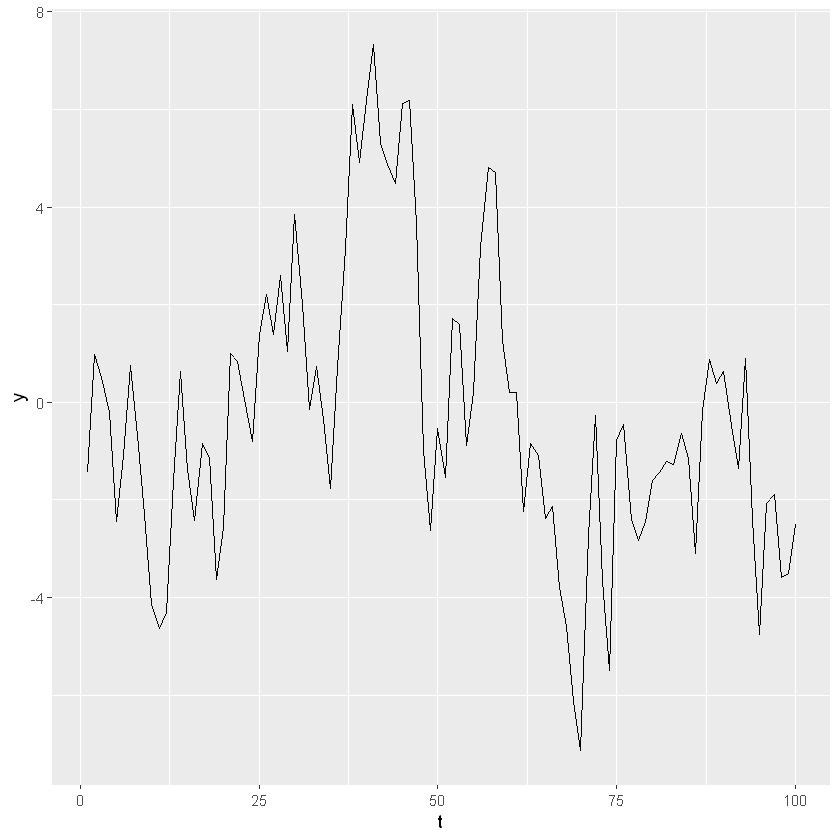

In [159]:
arma12_datos <- data.frame(t = 1:100, y = y[401:500])
g <- ggplot(data = arma12_datos, aes(x = t, y = y))
g + geom_line()

Las ACF y PACF lucirían asi:

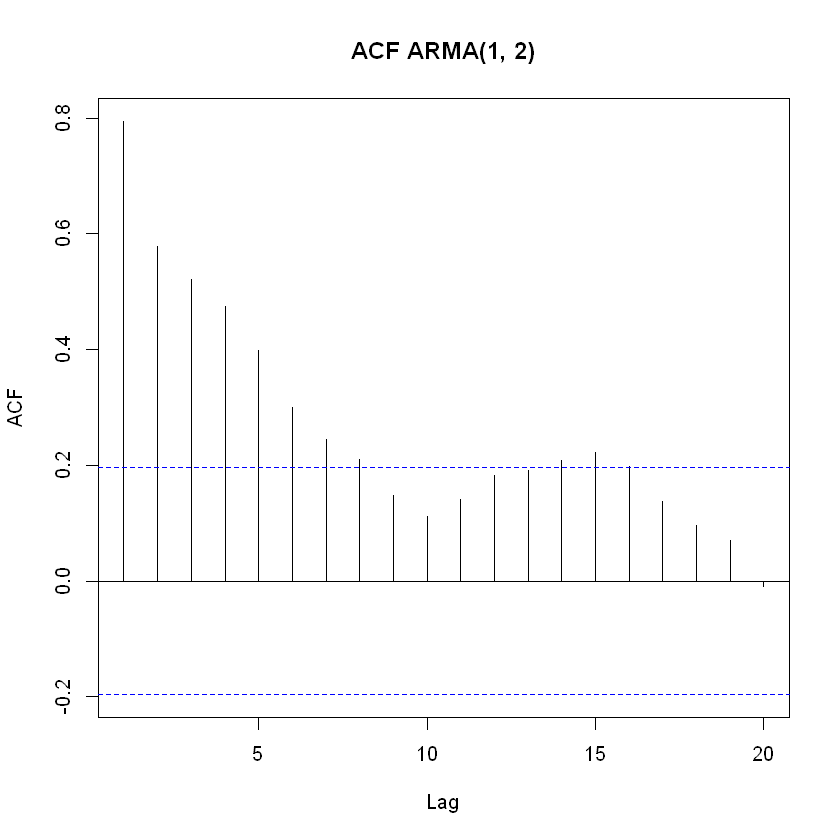

In [160]:
acf(arma12_datos$y, lag.max = 20, main = "ACF ARMA(1, 2)")

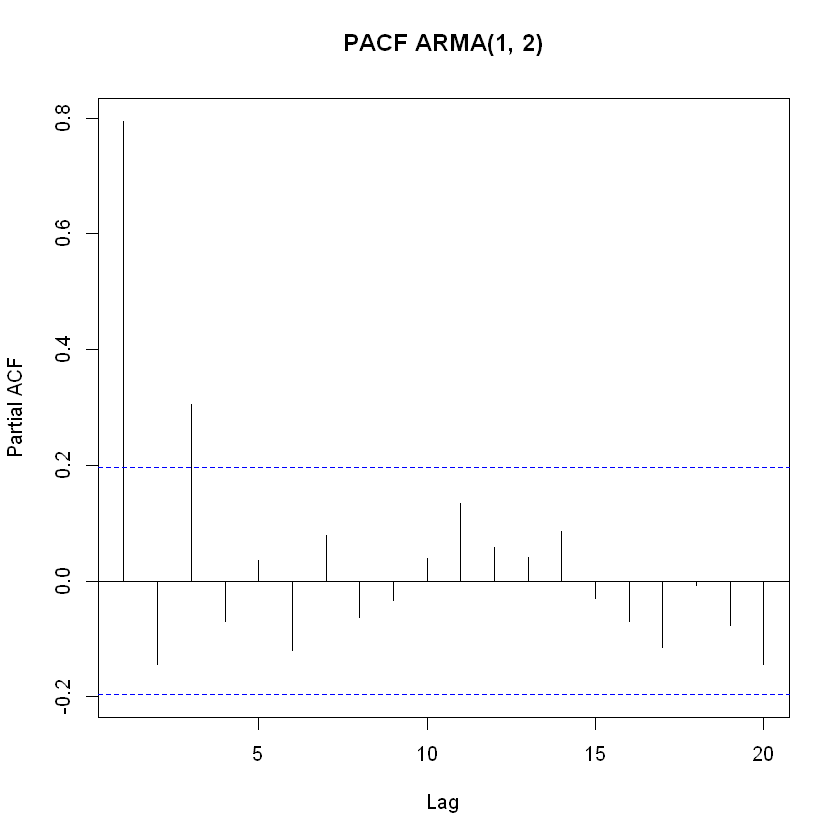

In [161]:
pacf(arma12_datos$y, lag.max = 20, main = "PACF ARMA(1, 2)")

La ACF señala que el proceso pude ser de orden MA(2) o mayor. En el caso de la PACF, ésta señala que el proceso puede ser AR(1) o AR(3). En conjunto, ambas gráficas señalan que uno de los procesos a considerar en las opciones es el ARMA(1, 2).

### 3.11 Función Generadora de Autocovarianzas

Para todos los procesos estacionarios descritos anteriormente hemos calculado sus respectivas secuencias de autocovarianzas $\{\gamma_j\}^\infty_{j = -\infty}$. Si esta secuencia se sumable en términos absolutos; entonces una manera de resumir todas estas autocovarianzas es através de una función que se la conoce como la **Función Generadora de Autocovarianzas**:

$$g_Y(z) = \sum^\infty_{j = -\infty}\gamma_j z^j$$

donde $z$ es un escalar que generalmente es complejo, particularmente uno que se encuentra en el círculo unitario. Asi:

$$z = \cos(\omega) - i \sin(\omega) = e^{-i \omega}$$

donde $i = \sqrt{- 1}$ y $\omega$ es el ángulo que hace $z$ con el eje real. Si reemplazamos este valor de $z$ en la **Función Generadora de Autocovarianzas** y la dividimos por $2\pi$, obtenemos lo que se conoce como el *espectro poblacional* de Y:

$$s_Y(\omega) = \frac{1}{2\pi}g_Y(e^{-i \omega}) = \frac{1}{2\pi}\sum^\infty_{j = -\infty}\gamma_je^{-i \omega}$$

Esto lo veremos más a detalle cuando veamos el Capítulo de Análisis Espectral.

Ahora bien, considerando el proceso MA(1), vimos que sus autocovarianzas vienen dadas por $\gamma_1 = \gamma_{-1} = \theta \sigma^2$ y $\gamma_0 = (1 + \theta^2)\sigma^2$. Reeemplazando estos valores en la **Función Generadora de Autocovarianzas** tenemos:

$$g_Y(z) = (\theta \sigma^2)z^{-1} + ((1 + \theta^2)\sigma^2)z^{0} + (\theta \sigma^2)z^{1}$$

lo cual puede reescribirse como:

$$g_Y(z) = \sigma^2(1 + \theta z)(1 + \theta z^{-1}) $$

En forma general, para el proceso MA(q), la **Función Generadora de Autocovarianzas** vendría dada por:

$$g_Y(z) = \sigma^2(1 + \theta_1 z + \theta_2 z^{2} + \dots + \theta_q z^{q})(1 + \theta_1 z^{-1} + \theta_2 z^{-2} + \dots + \theta_q z^{-q})$$

Si se desarrolla esta expresión, se obtienne todas las autocovarianzas del proceso MA(q). De igual forma, para el proceso AR(1) se tiene:

$$g_Y(z) = \frac{\sigma^2}{(1 - \phi z)(1 - \phi z^{- 1})}$$

Para el proceso AR(p) sería:

$$g_Y(z) = \frac{\sigma^2}{(1 - \phi_1 z - \phi_2 z ^2 - \dots - \phi_p z^p)(1 - \phi_1 z^{-1} - \phi_2 z^{-2} - \dots - \phi_p z^{-p})}$$

Finalmente para un proceso ARMA(p, q):

$$g_Y(z) = \frac{\sigma^2 (1 + \theta_1 z + \theta_2 z^{2} + \dots + \theta_q z^{q})(1 + \theta_1 z^{-1} + \theta_2 z^{-2} + \dots + \theta_q z^{-q})}{(1 - \phi_1 z - \phi_2 z ^2 - \dots - \phi_p z^p)(1 - \phi_1 z^{-1} - \phi_2 z^{-2} - \dots - \phi_p z^{-p})} $$


### 3.12 Invertibilidad

Sea el proceso MA(1):

$$Y_t - \mu = (1 + \theta L)\epsilon_t$$

si se cumple que $|\theta| < 1$ entonces podemos dividir todo el proceso por $(1 + \theta L)$, con lo que obtenemos un proceso AR($\infty$):

$$(Y_t - \mu) - \theta(Y_{t - 1} - \mu) + \theta^2(Y_{t - 2} - \mu) - \theta^3(Y_{t - 3} - \mu) + \dots = (1 - \theta L + \theta^2 L^2 - \theta^3 L^3 + \dots)(Y_t - \mu) = \epsilon_t$$

En este caso decimos que el proceso MA(1) es invertible.

Ahora bien, sea el proceso MA(1):

$$\tilde{Y}_t - \mu = (1 + \tilde{\theta} L)\tilde{\epsilon}_t$$



su función generadora de autocovarianzas vendría dada por:

$$g_Y(z) = \tilde{\sigma}^2(1 + \tilde{\theta} z)(1 + \tilde{\theta} z^{-1})$$

el cual puede reescribirse como:

$$g_Y(z) = (\tilde{\sigma}^2 \tilde{\theta}^2)(1 + \tilde{\theta}^{-1}z)(1 + \tilde{\theta}^{-1}z^{-1})$$

si $\theta = \tilde{\theta}^{-1}$ y $\sigma^2 =\tilde{\sigma}^2\tilde{\theta}^2$, entonces el proceso inicial MA(1) y este nuevo proceso tienen idénticos momentos. 

Esto quiere decir que si tenemos un proceso MA(1) no invertible con $\tilde{\theta} > 1$; podemos transformarlo en un proceso invertible con idénticos momentos si utilizamos $\tilde{\theta}^{-1}$. Veamos un ejemplo:

Sea el proceso MA(1) no invertible:

$$Y_t = \epsilon_t + 1.5 \epsilon_{t -1}$$

Obtengamos su ACF:

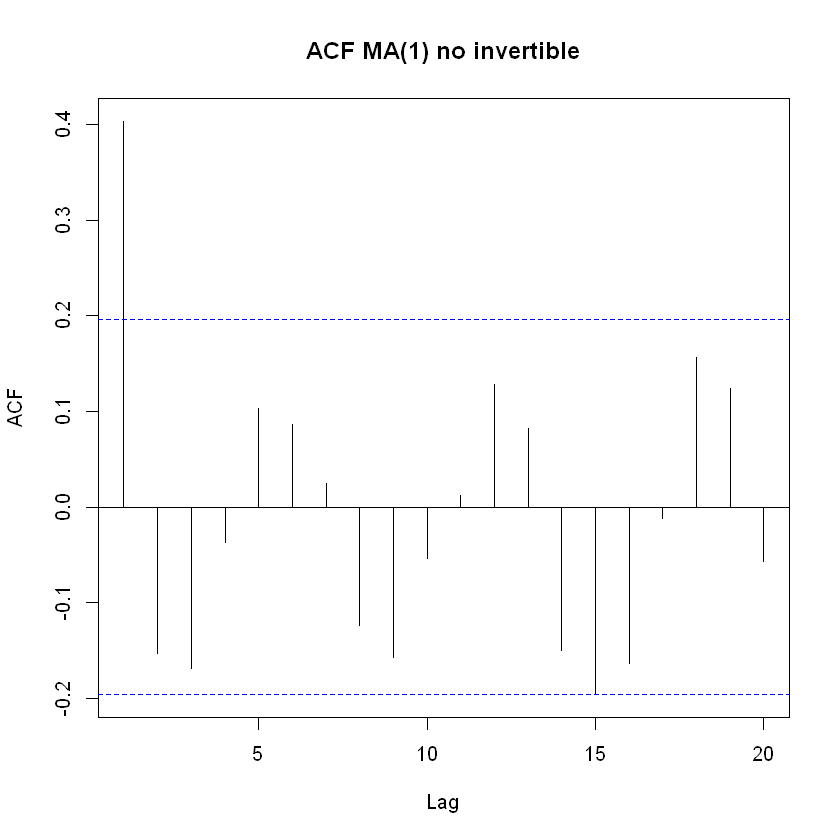

In [162]:
set.seed(12345)
theta <- 1.5
epsilon <- rnorm(101)
y <- rep(0, 101)
for (i in 2:101) {
    y[i] <- epsilon[i] + theta * epsilon[i - 1]
}
acf(y[2:101], lag.max = 20, main = "ACF MA(1) no invertible")

Ahora transformemos el proceso en uno invertible y veamos si ACF:

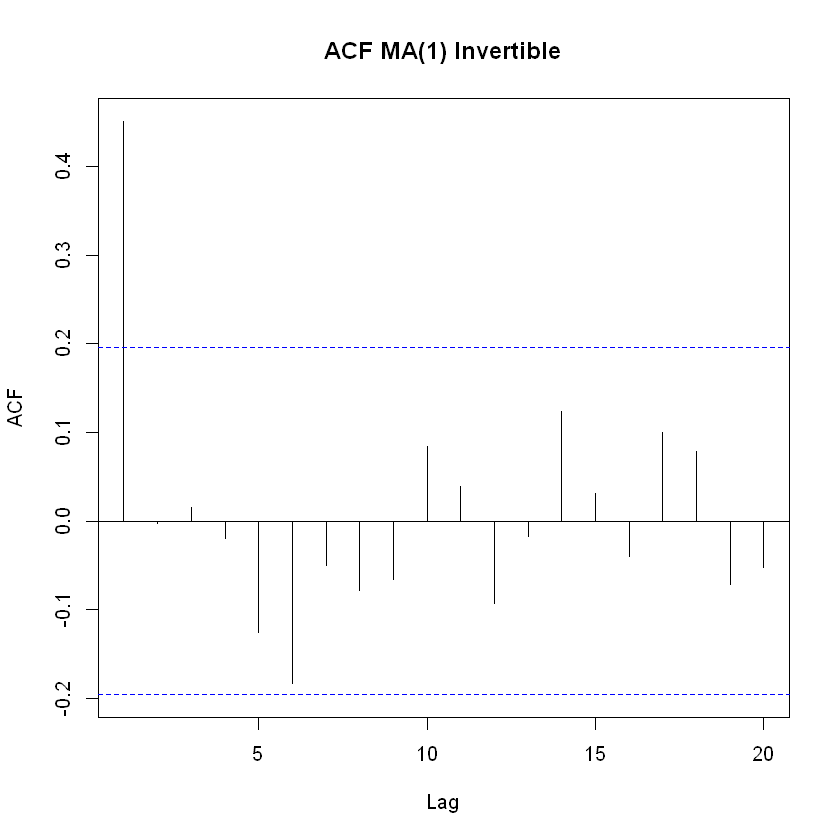

In [163]:
epsilon_n <- rnorm(101, sd = 1 / theta)
y_n <- rep(0, 101)
for (i in 2:101) {
    y_n[i] <- epsilon_n[i] + (1 / theta) * epsilon_n[i - 1]
}
acf(y_n[2:101], lag.max = 20, main = "ACF MA(1) Invertible")

En ambos casos, se obtiene una primera autocorrelaciín de aproximadamente 0.4. Las restantes autocorrelaciones son 0.

Pero ¿cuál es el problema en tener un proceso MA(1) no invertible? Bueno en el caso de que sea invertible vimos que:

$$\epsilon_t = (Y_t - \mu) - \theta(Y_{t - 1} - \mu) + \theta^2(Y_{t - 2} - \mu) - \theta^3(Y_{t - 3} - \mu) + \dots$$

Esto nos dice que podemos obtener el proceso ruido blanco $\epsilon_t$ con el valor actual y pasado de $Y$. Sin embargo, si el proceso $MA(1)$ es no invertible:

$$\tilde{\epsilon}_t = \theta(Y_{t + 1} - \mu) - \theta^2(Y_{t + 2} - \mu) + \theta^3(Y_{t + 3} - \mu) - \dots$$

Es decir que para obtener el proceso ruido blanco $\epsilon_t$, necesitamos todos los valores futuros de $Y$. Algo que desconocemos totalmente.

En el caso de un modelo MA(q):

$$ Y_t - \mu = (1 + \theta_1 L + \theta_2 L^2 + \dots + \theta_q L^q)\epsilon_t $$

las raices del polinomio característico $1 + \theta_1 z + \theta_2 z^2 + \dots + \theta_q z^q$ deben estar fuera del círculo unitario para que sea invertible. En el caso que alguna de las raíces esté dentro del circulo unitario, descomponemos el polinomio de la siguiente forma:

$$1 + \theta_1 L + \theta_2 L^2 + \dots + \theta_q L^q = (1 - \lambda_1 L)(1 - \lambda_2 L) \dots (1 - \lambda_q L)$$

donde $\lambda_i$ para $i = 1, \dots, q$ están dentro del círculo unitario si el proceso MA(q) es invertible. En caso que algunos $\lambda_i$ estén fuera del círculo unitario se los sustituye con su inversa $\lambda^{-1}_i$ para que el proceso MA(q) sea invertible.

### 3.13 Estimación de los modelos ARMA

Sea el modelo ARMA:

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q}$$

Hasta el momento hemos trabajado con parámetros $\Theta = [c, \phi_1, \phi_2, \dots, \phi_p, \theta_1, \theta_2, \dots, \theta_q, \sigma^2]$ conocidos. Ahora corresponde definir métodos que nos permitan obtener estos parámetros en base a los datos que analizamos $y_1, y_2, \dots, y_T$. Para definimos primero la probabilidad conjunta de haber observado estos datos en base a los parámetros dados.

$$f_{Y_1, Y_2, \dots, Y_T}(y_1, y_2, \dots, y_T; \Theta)$$

donde $f(.)$ es la función de densidad conjunta de las variables aleatorias $Y_1, Y_2, \dots, Y_T$. El método que utilizaremos es el de máxima verosimilitud y lo que busca es hallar el conjunto de parámetros $\Theta$ tal que la probabilidad conjunta definida sea la máxima.

Entonces el método de máxima verosimilitud conlleva dos etapas:

1. Construir la función de verosimilitud.
2. Maximizar esta función.

Empezaremos con el modelo AR(1):

$$ Y_t = c + \phi Y_{t - 1} + \epsilon_t$$

donde asumiremos que $\epsilon_t$ es ruido blanco gaussiano. Por lo tanto $Y_t$ es gaussiano. Empezemos asumiendo que $y_1$ ya está dado (en realidad si lo está porque está en nuestros datos) entonces:

$$(Y_2 | Y_1 = y_1) \sim N((c + \theta y_1), \sigma^2)$$

lo que significa que:

$$f_{Y_2|Y_1}(y_2|y_1; \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left[\frac{-(y_2 - c - \phi y_1)^2}{2\sigma^2}\right]$$

Podemos hacer lo mismo con $y_3$ considerando como dados $y_2$ y $y_1$.

$$f_{Y_3|Y_2, Y_1}(y_3|y_2, y_1; \theta) = f_{Y_3|Y_2}(y_3|y_2; \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left[\frac{-(y_3 - c - \phi y_2)^2}{2\sigma^2}\right]$$

entonces la densidad conjunta condicional en haber observadi $y_1$ es:

$$f_{Y_3, Y_2|Y_1}(y_3, y_2|y_1; \theta) =  f_{Y_3|Y_2}(y_3|y_2; \theta) \times f_{Y_2|Y_1}(y_2|y_1; \theta)$$

asi en términos generales la densidad conjunta condicionada en haber observado $y_1$ está dada por:

$$f_{Y_T, Y_{T - 1}, \dots, Y_2|Y_1}(y_T, y_{T - 1}, \dots, y_2|y_1; \Theta) = \prod^T_{t = 2}f_{Y_t|Y_{t - 1}}(y_t|y_{t - 1}; \Theta) $$

Aplicando logaritmos:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_2 | Y_1}(y_T, y_{T - 1}, \dots, y_2 | y_1; \Theta) = -\left(\frac{T - 1}{2}\right)\log(2 \pi) - \left(\frac{T - 1}{2}\right)\log(\sigma^2) - \sum^T_{t = 2}\left[\frac{(y_t - c - \phi y_{t - 1})^2}{2 \sigma^2}\right]$$

Esta es la función de verosimilitud que se busca maximizar. Pero esto equivale a minimizar el termino $\sum^T_{t = 2}(y_t - c - \phi y_{t - 1})^2$ que se lo efectúa al aplicar el método de mínimos cuadrados ordinarios. Entonces, la estimación de los parámetros $\Theta$ del modelo AR(1) se reducen a la aplicación de mínimos cuadrados ordinarios, donde $\hat{\sigma}^2$ es el promedio de los residuos al cuadrado de la estimación por MCO.

En el caso del modelo AR(p):

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t$$

nuevamente asumimos que $\epsilon_t$ es ruido blanco gaussiano y por ende $Y_t$ es gaussiano. Consideremos que las primeras $p$ observaciones son dadas. Entonces la densidad conjunta condicional sería:

$$f_{Y_T, Y_{T - 1}, \dots, Y_{p + 1} | Y_p, Y_{p - 1}, \dots, Y_1}(y_T, y_{T - 1}, \dots, y_{p + 1} | y_p, y_{p - 1}, \dots, y_1; \Theta) = \prod^T_{t = p + 1}f_{Y_t | Y_{t - 1}, Y_{t - 2}, \dots, Y_{t - p}}(y_t | y_{t - 1}, y_{t - 2}, \dots, y_{t - p}; \Theta)$$

Aplicando logaritmos se obtiene:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_{p + 1} | Y_p, Y_{p - 1}, \dots, Y_1}(y_T, y_{T - 1}, \dots, y_{p + 1} | y_p, y_{p - 1}, \dots, y_1; \Theta) = -\left(\frac{T - p}{2}\right)\log(2 \pi) - \left(\frac{T - p}{2}\right)\log(\sigma^2) - \sum^T_{t = p + 1}\frac{(y_t - c - \phi_1 y_{t - 1} - \phi_2 y_{t - 2} - \dots - \phi_p y_{t - p})^2}{2 \sigma^2}$$ 

Esta es la función de verosimilitud que hay que maximizar, pero ello equivale a minimizar $\sum^T_{t = p + 1} (y_t - c - \phi_1 y_{t - 1} - \phi_2 y_{t - 2} - \dots - \phi_p y_{t - p})^2$ por lo que para estimar los parámetros del modelo AR(p) aplicamos MCO considerando las primeras $p$ observaciones como dadas. $\hat{\sigma}^2$ sería el promedio de los residuos cuadráticos resultantes de aplicar MCO.

Para ejemplificar consideremos al modelo AR(1):

$$Y_t = 1.5 + 0.8 Y_{t - 1} + \epsilon_t$$

In [164]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    y[i] <- 0.8*y[i - 1] + epsilon[i]
}
ar1_mod <- arima(y[401:500], order = c(1, 0, 0), method = "CSS", include.mean = FALSE)
ar1_mod


Call:
arima(x = y[401:500], order = c(1, 0, 0), include.mean = FALSE, method = "CSS")

Coefficients:
         ar1
      0.8765
s.e.  0.0493

sigma^2 estimated as 0.7651:  part log likelihood = -128.51

Como podemos ver, nuestra estimación es cercana a lo definido. 

Ahora analizaremos el caso del modelo MA(1):

$$Y_t = \mu + \epsilon_t + \theta \epsilon_{t - 1}$$

Supongamos que tenemos dado que: $\epsilon_0 = 0$ y como tenemos los datos $y_1, y_2, \dots, y_T$ y si asumimos que contamos con los parámetros $\mu$ y $\theta$, podemos obtener $\epsilon_t$ para $t = 1, 2, \dots, T$.

$$\epsilon_t = y_t - \mu - \theta \epsilon_{t - 1}$$

La función de verosimilitud condicional viene dada por:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_1| \epsilon_0 = 0}(y_T, y_{T - 1}, \dots, y_1 | \epsilon_0 = 0 ; \Theta) = -\frac{T}{2}\log(2\pi) - \frac{T}{2}\log(\sigma^2) - \sum^T_{t = 1}\frac{\epsilon^2_t}{2 \sigma^2}$$

como no conocemos los parámetros del modelo $\Theta$ tampoco conocemos los $\epsilon_t$ por lo que no podemos emplear el método MCO acá y tenemos que recurrir a maximización de la función de verosimilitud presentada. 

Habíamos mencionado que si $|\theta| < 1$; entonces el proceso MA(1) es invertible. En este caso como contamos con un número finito de datos podemos expresar $\epsilon_t$ como:

$$\epsilon_t = (y_t - \mu) - \theta(y_{t - 1} - \mu) + \theta^2(y_{t - 2} - \mu) - \dots + (-1)^{t - 1}\theta^{t - 1}(y_1 - \mu) + (-1)^t\theta^t \epsilon_0$$

Esto quiere decir que si el proceso es invertible entonces el efecto de haber definido $\epsilon_0 = 0$ desaparece; sin embargo, si el proceso no es invertible entonces el valor inicial definido tiene mucha influencia en los $\epsilon_t$ estimados. Por ello, lo ideal es que el proceso MA(1) sea invertible.

Ahora analizamos el caso de un modelo MA(q):

$$Y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q}$$

Partimos del supusto que conocemos $q$ valores $\epsilon_0 = \epsilon_{-1} = \epsilon_{-2} = \dots = \epsilon_{-q + 1} = 0$. Entonces podemos obtener los $T$ $\epsilon_t$ con la siguiente relación (obviamente si conocemos los parámetros también):

$$\epsilon_t = y_t - \mu - \theta_1 \epsilon_{t - 1} - \theta_2 \epsilon_{t - 2} - \dots - \theta_q \epsilon_{t - q}$$

La función de verosimilitud condicional vendría dada por:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_1 | \epsilon_0 = \epsilon_{-1} = \dots =\epsilon_{-q + 1} = 0}(y_T, y_{T - 1}, \dots, y_1 | \epsilon_0 = \epsilon_{-1} = \dots =\epsilon_{-q + 1} = 0 ; \Theta) = -\frac{T}{2}\log(2 \pi) - \frac{T}{2}\log(\sigma^2) - \sum^T_{t = 1}\frac{\epsilon^2_t}{2\sigma^2}$$

Nuevamente, no puede aplicarse MCO y es necesaria la maximización de esta función. Ests método es confiable si el proceso MA(q) es invertible.

Ejemplificaremos con el siguiente proceso MA(1):

$$Y_t = \epsilon_t + 0.7\epsilon_{t - 1}$$


In [165]:
set.seed(12345)
epsilon <- rnorm(101, sd = 2)
y <- rep(0, 101)
for (i in 2:101) {
    y[i] <- epsilon[i] + 0.7 * epsilon[i - 1] 
}
ma1_mod <- arima(y[2:101], order = c(0, 0, 1), method = "ML", include.mean = FALSE)
ma1_mod


Call:
arima(x = y[2:101], order = c(0, 0, 1), include.mean = FALSE, method = "ML")

Coefficients:
         ma1
      0.7580
s.e.  0.0815

sigma^2 estimated as 5.121:  log likelihood = -223.98,  aic = 449.97

El resultado es muy cercano al valor especificado.

Ahora consideremos un modelo ARMA(p, q):

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q}$$

Consideramos las primeras $p$ observaciones como dadas y asumimos que $\epsilon_p = \epsilon_{p - 1} = \dots = \epsilon_{p - q + 1} = 0$. Con esta información podemos construir los $\epsilon_t$ empezando de $t = p + 1$.

$$\epsilon_t = y_t - c - \phi_1 y_{t - 1} - \phi_2 y_{t - 2} - \dots - \phi_p Y_{t - p} - \theta_1 \epsilon_{t - 1} - \theta_2 \epsilon_{t - 2} - \dots - \theta_q \epsilon_{t - q}$$

donde la función de verosimilitud condicional viene dada:

$$\log f_{Y_T, Y_{T - 1}, \dots, Y_{p + 1}| Y_p, Y_{p - 1}, \dots, Y_1, \epsilon_p = \epsilon_{p - 1} = \dots = \epsilon_{p - q + 1} = 0}(y_T, y_{T - 1}, \dots, y_{p + 1} | y_p, y_{p - 1}, \dots, y_1, \epsilon_p = \epsilon_{p - 1} = \dots = \epsilon_{p - q + 1} = 0) = -\frac{T - p}{2}\log(2 \pi) - \frac{T - p}{2}\log(\sigma^2) - \sum^T_{t = p + 1}\frac{\epsilon^2_t}{2 \sigma^2}$$

Tal función debe maximizarse para obtener los parámetros. Este procedimiento es adecuado si el componente MA(q) es invertible.

Consideremos el siguiente proceso ARMA(1, 1):

$$Y_t = 0.6 Y_{t - 1} + \epsilon_t + 0.3 \epsilon_{t - 1}$$

In [166]:
set.seed(12345)
epsilon <- rnorm(500, sd = 2)
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    y[i] <- 0.6 * y[i - 1] + epsilon[i] + 0.3 * epsilon[i - 1]
}
arma11_mod <- arima(y[401:500], order = c(1, 0, 1), method = "CSS-ML", include.mean = FALSE)
arma11_mod


Call:
arima(x = y[401:500], order = c(1, 0, 1), include.mean = FALSE, method = "CSS-ML")

Coefficients:
         ar1     ma1
      0.6220  0.4991
s.e.  0.0957  0.1234

sigma^2 estimated as 2.965:  log likelihood = -196.89,  aic = 397.78

La estimación nos da un valor muy cercano para el componente AR pero un poco alejado para el componente MA.

### 3.14 Diagnóstico

Una vez estimado nuestro modelo ARMA preferido debemos verificar que los residuos sean ruido blanco; es decir que todas las autocorrelaciones sean 0. Empezamos la verificación con el gráfico ACF:

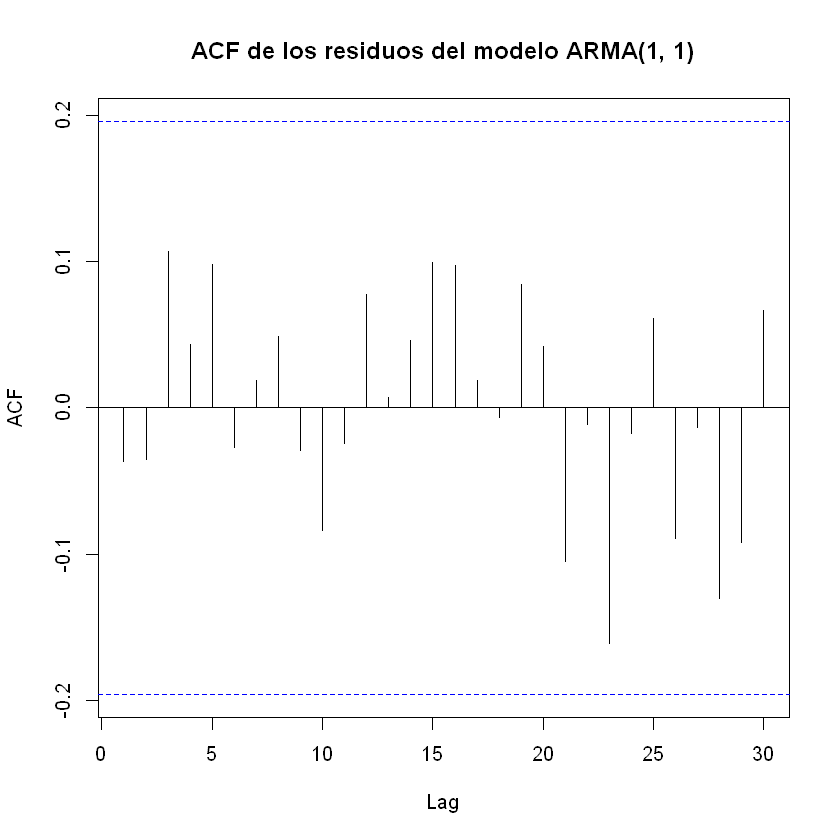

In [167]:
acf(arma11_mod$residuals, lag.max = 30, main = "ACF de los residuos del modelo ARMA(1, 1)")

Existen tambien las llamadas pruebas de [Portmanteau](https://es.wikipedia.org/wiki/Prueba_de_Ljung-Box) que verifican si la autocorrelaciones en conjunto son 0 o distintas de 0.

In [168]:
for (i in c(1, 5, 10, 20)) {
    p_test <- Box.test(arma11_mod$residuals, lag = i, type = "Box-Pierce")
    print(p_test$p.value)
}

[1] 0.7169749
[1] 0.7684731
[1] 0.9604969
[1] 0.9950085


In [169]:
for (i in c(1, 5, 10 , 20)) {
    p_test <- Box.test(arma11_mod$residuals, lag = i, type = "Ljung-Box")
    print(p_test$p.value)
}

[1] 0.7129058
[1] 0.7454958
[1] 0.9485406
[1] 0.987908


Por lo tanto concluimos que los residuos son ruido blanco.

### 3.15 Pronóstico

Sea el modelo MA(1):

$$Y_t = \mu + \epsilon_t + \theta \epsilon_{t - 1}$$

Los pronósticos del modelo MA(1) tiene la siguiente propiedad:

- Más allá de 1 periodo hacia adelante, el pronóstico es solamente la media del proceso $\mu$.

Ilustremos esto con un ejemplo. Sea el proceso MA(1):

$$Y_t = \epsilon_t + 0.75\epsilon_{t - 1}$$

In [170]:
set.seed(12345)
epsilon <- rnorm(101)
y <- rep(0, 101)
for (i in 2:101) {
    y[i] <- epsilon[i] + 0.75 * epsilon[i - 1]
}
ma1_mod <- arima(y[2:101], order = c(0, 0, 1), include.mean = FALSE, method = "ML")
ma1_for <- predict(ma1_mod, n.ahead = 10)
str(ma1_for)

List of 2
 $ pred: Time-Series [1:10] from 101 to 110: 0.0894 0 0 0 0 ...
 $ se  : Time-Series [1:10] from 101 to 110: 1.13 1.46 1.46 1.46 1.46 ...


Como puede observarse, a partir del segundo periodo en adelante el pronóstico es la media del proceso que es 0. 

Ahora analicemos el modelo MA(q):

$$Y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q}$$

La propiedad del pronóstico del modelo MA(q) es:

- Después de $q$ periodos hacia adelante el pronóstico es sólo la media $\mu$ del proceso.

Ilustremos esto con un modelo MA(2):

$$Y_t = \epsilon_t + 0.8 \epsilon_{t - 1} - 0.1 \epsilon_{t - 2}$$

Primero debemos asegurarnos que este proceso es invertible:

In [171]:
polyroot(c(1, 0.8, -0.1))

[1] -1.09902+0i  9.09902-0i

El proceso es invertible.

In [172]:
set.seed(12345)
epsilon <- rnorm(102)
y <- rep(0, 102)
for (i in 3:102) {
    y[i] <- epsilon[i] + 0.8 * epsilon[i - 1] - 0.1 * epsilon[i - 2]
}
ma2_mod <- arima(y[3:102], order = c(0, 0, 2), include.mean = FALSE, method = "ML")
ma2_for <- predict(ma2_mod, n.ahead = 10)
str(ma2_for)

List of 2
 $ pred: Time-Series [1:10] from 101 to 110: -0.793 0.126 0 0 0 ...
 $ se  : Time-Series [1:10] from 101 to 110: 1.11 1.46 1.47 1.47 1.47 ...


Como mencionamos, después de 2 periodos adelante el pronóstico es solamente la media del proceso que es 0.

Ahora analizamos el caso de un modelo AR(1):

$$Y_t = c + \phi Y_{t - 1} + \epsilon_t$$

La propiedad de los pronósticos con modelos AR(1) es que éstos convergen a la media del proceso $\mu = \frac{c}{1 - \theta}$ a medida que aumentan los periodos de tiempo.

Ilustremos esto con un ejemplo. Sea el proceso AR(1):

$$Y_t = 0.85Y_{t - 1} + \epsilon_t$$

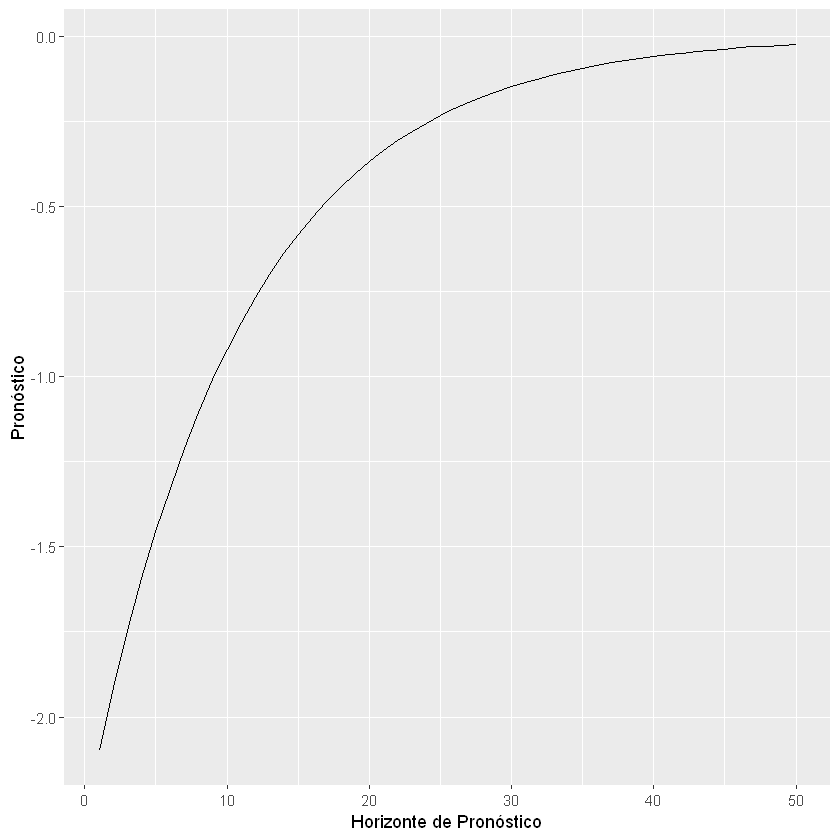

In [173]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    y[i] <- 0.85 * y[i - 1] + epsilon[i]
}
ar1_mod <- arima(y[401:500], order = c(1, 0, 0), method = "CSS", include.mean = FALSE)
ar1_for <- predict(ar1_mod, n.ahead = 50)
ar1for_datos <- data.frame(t = 1:50, pred = as.numeric(ar1_for$pred))
g <- ggplot(data = ar1for_datos, aes(x = t, y = pred))
g + geom_line() + labs(x = "Horizonte de Pronóstico", y = "Pronóstico")

Como podemos observar el pronóstico converge a la media del proceso que es 0.

Ahora veamos el caso del modelo AR(p):

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p}$$

Al igual que en el caso del modelo AR(1), en el modelo AR(p) el pronóstico converge a la media del proceso $\mu = \frac{c}{1 - \phi_1 - \phi_2 - \dots - \phi_p}$ a medida que avanzamos en el horizonte de pronóstico.

Ilustremos esto con un modelo AR(2):

$$Y_t = 1.1 Y_{t - 1} - 0.18 Y_{t - 2} + \epsilon_t$$

Este modelo ya lo vimos anteriormente y verificamos que sea estacionario.

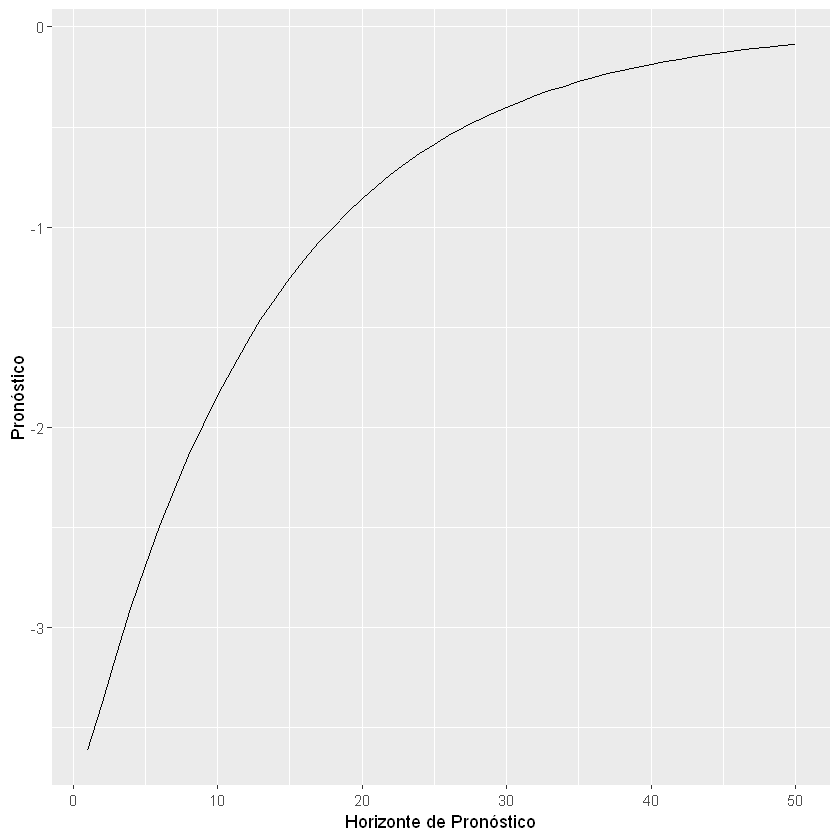

In [174]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1; y[2] <- 2
for (i in 3:500) {
    y[i] <- 1.1 * y[i - 1] - 0.18 * y[i - 2] + epsilon[i]
}
ar2_mod <- arima(y[401:500], order = c(2, 0, 0), method = "CSS", include.mean = FALSE)
ar2_for <- predict(ar2_mod, n.ahead = 50)
ar2for_datos <- data.frame(t = 1:50, pred = as.numeric(ar2_for$pred))
g <- ggplot(data = ar2for_datos, aes(x = t, y = pred))
g + geom_line() + labs(x = "Horizonte de Pronóstico", y = "Pronóstico")

Como se puede observar, el pronóstico se aproxima a la media del proceso que es 0.

Finalmente consideremos el modelo ARMA(p, q):

$$Y_t = c + \phi_1 Y_{t - 1} + \phi_2 Y_{t - 2} + \dots + \phi_p Y_{t - p} + \epsilon_t + \theta_1 \epsilon_{t - 1} + \theta_2 \epsilon_{t - 2} + \dots + \theta_q \epsilon_{t - q}$$

La propiedad de los pronósticos con este modelo es que convergen hacia la media del proceso $\mu = \frac{c}{1 - \phi_1 - \phi_2 - \dots - \phi_p}$ despues de $q$ periodos en el horizonte de pronóstico.

Ilustremos esto con un modelo ARMA(1, 1):

$$Y_t = 0.55 Y_{t - 1} + \epsilon_t - 0.95 \epsilon_{t - 1}$$



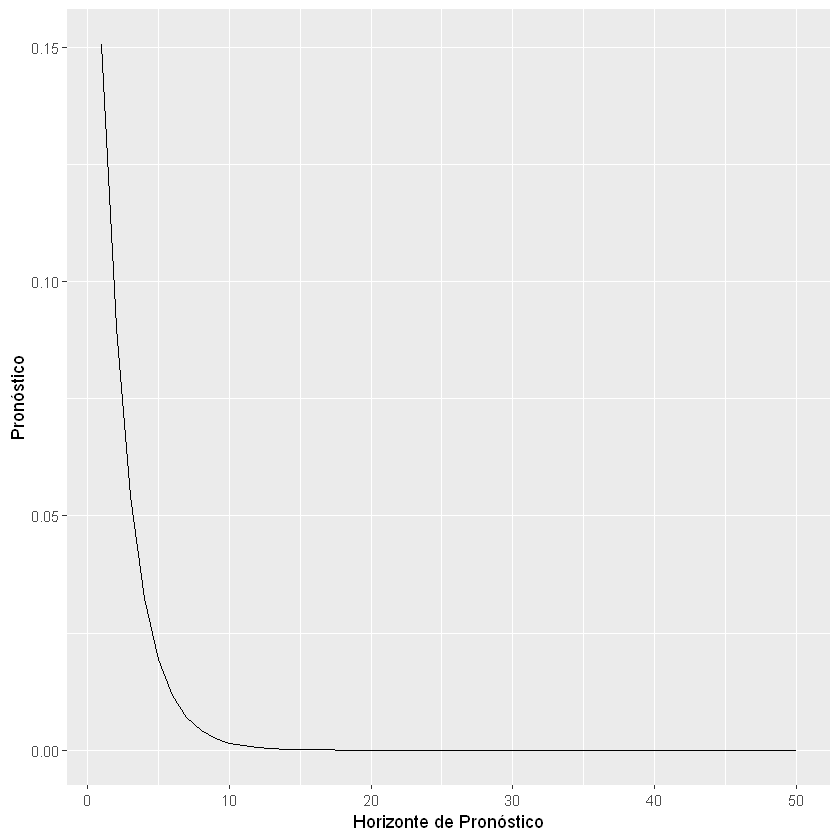

In [175]:
set.seed(12345)
epsilon <- rnorm(500)
y <- rep(0, 500)
y[1] <- 1
for (i in 2:500) {
    y[i] <- 0.55 * y[i - 1] + epsilon[i] - 0.95 * epsilon[i - 1]
}
arma11_mod <- arima(y[401:500], order = c(1, 0, 1), include.mean = FALSE, method = "ML")
arma11_for <- predict(arma11_mod, n.ahead = 50)
arma11for_datos <- data.frame(t = 1:50, pred = as.numeric(arma11_for$pred))
g <- ggplot(data = arma11for_datos, aes(x = t, y = pred))
g + geom_line() + labs(x = "Horizonte de Pronóstico", y = "Pronóstico")

Como puede observarse, el pronóstico converge a la media del proceso que es 0 después de 1 periodo hacia adelante.

Finalmente para concluir esta sección, mostraremos una medida para evaluar el desempeño de un pronóstico. se la conoce como la *raíz del error cuadrático medio* o RMSE, que se define como:

$$RMSE = \sqrt{\frac{\sum^h_{j = 1}(y_{t + j} - y^*_{t + j})^2}{h}}$$

donde $y^*_{t + j}$ es el pronóstico efectuado, $y_{t + j}$ es el valor observado y $h$ es el horizonte de pronóstico (número de periodos de pronóstico). 

Para ejemplificar consideremos un modelo ARMA(1,1):

$$Y_t = 1.2 + 0.5 Y_{t - 1} + \epsilon_t + 0.8 \epsilon_{t - 1}$$

In [176]:
set.seed(12345)
epsilon <- rnorm(510)
y <- rep(0, 510)
y[1] <- 1
for (i in 2:510) {
    y[i] <- 1.2 + 0.5 * y[i - 1] + epsilon[i] + 0.8 * epsilon[i - 1]
}
arma11_mod <- arima(y[401:500], order = c(1, 0, 1), method = "ML")
h <- 10
arma11_for <- predict(arma11_mod, n.ahead = h)
RMSE_arma11 <- sqrt(mean((y[501:510] - as.numeric(arma11_for$pred))^2))
print(paste("El RMSE del modelo ARMA(1,1) es", RMSE_arma11))


[1] "El RMSE del modelo ARMA(1,1) es 2.47297056508468"


### 3.16 Selección del orden de ARMA(p, q)

Hemos visto que la ACF y la PACF son útiles para determinar el orden del proceso ARMA(p, q); sin embargo, éstas nos pueden dar mucahs alternativas de posibles modelos. ¿Cómo escoger el orden p y q más adecuados? La respuesta es empleando el criterio de Akaike y el criterio de Schwartz.

$$AIC = 2k - 2\log(\hat{L})$$
$$BIC = k\log(T) - 2\log(\hat{L})$$

donde $\hat{L}$ es el valor de la función de verosimilitud al ser maximizada, $k$ es el número de parámetros y $T$ es el tamaño de la muestra. Se escoge el modelo con los valores AIC y BIC mínimos. Ambos criterios benefician modelos con un buen ajuste pero existe una penalización por el incremento en los parámetros a estimar. Generalmente, el criterio BIC da modelos más parsimoniosos; es decir, modelos con menos parámetros.

In [177]:
AIC(arma11_mod)

[1] 265.1448

In [178]:
BIC(arma11_mod)

[1] 275.5655

### 3.17 Caso de Estudio - Proyección a tres meses de la inflación mensual en Bolivia

Utilizaremos todo lo visto en este capítulo para hacer un pronóstico de corto plazo (ideal uso de los modelos ARMA) de la inflación mensual de Bolivia. Empezaremos descargando los datos:

In [179]:
url <- "https://nube.ine.gob.bo/index.php/s/UonLRDITXiVjHf0/download"
if (!file.exists("./Datos/IPC.xlsx")) {
    download.file(url, destfile = "./Datos/IPC.xlsx", mode = "wb")
}

Los datos son mensuales desde 1937 hasta 2020. Seleccionaremos un periodo de estabilidad económica para hacer el análisis 2007 - 2019. Nuestro objetivo es pronosticar los niveles mensuales de inflación para el primer trimestre de 2019, con datos hasta diciembre de 2018. Empezamos leyendo sólo los datos que vamos a necesitar: 

In [180]:
datos <- read_xlsx("./Datos/IPC.xlsx", sheet = 3, range = "BT5:CF17")
datos$Mes <- 1:12
tail(datos)

2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mes
2.6765572,0.4580674,-0.2013813,0.6183445,0.5319574,0.3831583,0.61161722,0.73459008,0.60619358,0.03343438,0.75122617,0.04157434,0.22673896,7
1.5906492,0.6534413,0.6239945,1.0566908,0.3792444,0.3540718,1.33857482,0.06392583,0.20068945,0.12665089,0.79063856,0.17209292,0.50156833,8
0.1897392,0.8809587,0.1114317,0.7657854,0.3043685,0.3726044,1.35968877,-0.37559019,0.46960284,0.44890764,0.80197922,-0.08621872,-0.08143468,9
1.2467436,0.1775514,0.3178302,1.2239936,0.4731726,0.3817033,0.73316127,0.09701627,0.33244358,0.36693526,-0.21422961,0.17610829,0.44985057,10
1.2279378,0.1317570,-0.1935546,1.1144138,0.3228558,0.4746112,-0.03078452,0.70963967,0.05294214,0.41552613,0.07775933,0.25959070,1.11485620,11
0.6319240,0.4273941,0.2337439,1.7647827,0.4900627,0.5340692,0.08198952,0.83728987,0.16598571,0.28870763,0.33690561,0.34606844,-1.53959797,12


In [181]:
library(tidyr)

In [182]:
datos_long <- pivot_longer(datos, cols = !Mes, names_to = "Fecha", values_to = "IPC")
head(datos_long)

Mes,Fecha,IPC
1,2007,1.4345386
1,2008,1.0903747
1,2009,0.3596747
1,2010,0.1701759
1,2011,1.2926353
1,2012,0.3007289


In [195]:
datos_n <- data.frame(Fecha = rep(0, nrow(datos_long)), IPC = rep(0, nrow(datos_long)))
fecha <- seq(as.Date("01/01/2007", "%d/%m/%Y"), as.Date("01/12/2019", "%d/%m/%Y"), by = "month")
datos_n$Fecha <- fecha
years <- c(2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019)
for (i in 1:13) {
    datos_n[(1 + 12 * (i - 1)):(12 * i), "IPC"] <- datos_long[which(datos_long$Fecha == years[i]), "IPC"] 
}


In [199]:
tail(datos_n, 14)

,Fecha,IPC
143,2018-11-01,0.25959070
144,2018-12-01,0.34606844
145,2019-01-01,0.22627512
146,2019-02-01,-0.15241018
147,2019-03-01,-0.01703759
148,2019-04-01,0.14016510
149,2019-05-01,0.45557053
150,2019-06-01,0.15613749
151,2019-07-01,0.22673896
152,2019-08-01,0.50156833


Esta sería el análisis de estacionalidad y tendencia de la inflación mensual:

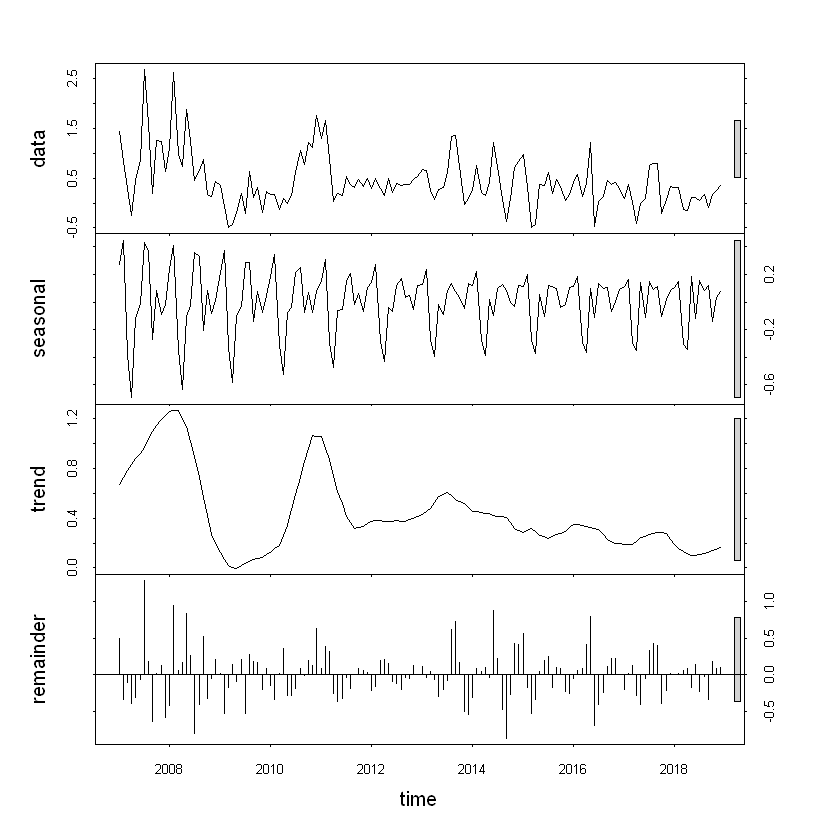

In [201]:
infl <- ts(datos_n$IPC[1:144], start = c(2007, 1), end = c(2018, 12), frequency = 12)
infl_decomp <- stl(infl, s.window = 15, t.window = 15, s.degree = 1, t.degree = 1)
plot(infl_decomp)

Pasamos a modelar la tendencia con un polinomio de grado 4:

In [205]:
n <- nrow(datos_n)
datos_n$t <- 1:n
datos_n$t2 <- datos_n$t^2
datos_n$t3 <- datos_n$t^3
datos_n$t4 <- datos_n$t^4
m_mod <- lm(IPC ~ t + t2 + t3 + t4, data = datos_n[1:144,])
summary(m_mod)


Call:
lm(formula = IPC ~ t + t2 + t3 + t4, data = datos_n[1:144, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.33449 -0.26887 -0.08403  0.19307  1.89530 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.276e+00  2.172e-01   5.877 2.95e-08 ***
t           -5.420e-02  2.060e-02  -2.631  0.00947 ** 
t2           1.201e-03  5.749e-04   2.088  0.03859 *  
t3          -1.068e-05  5.948e-06  -1.795  0.07483 .  
t4           3.186e-08  2.035e-08   1.566  0.11971    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4997 on 139 degrees of freedom
Multiple R-squared:  0.1575,	Adjusted R-squared:  0.1332 
F-statistic: 6.495 on 4 and 139 DF,  p-value: 8.037e-05


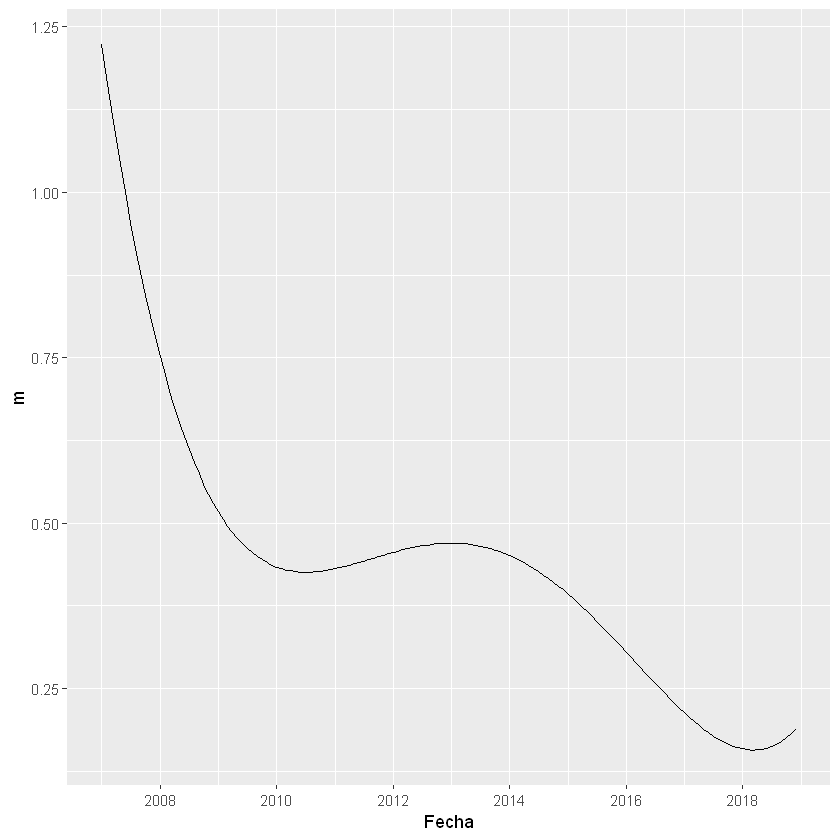

In [207]:
datos_n$m <- c(predict(m_mod), rep(0, 12))
g <- ggplot(data = datos_n[1:144,], aes(x = Fecha, y = m))
g + geom_line()

Ahora estimamos el componente estacional:

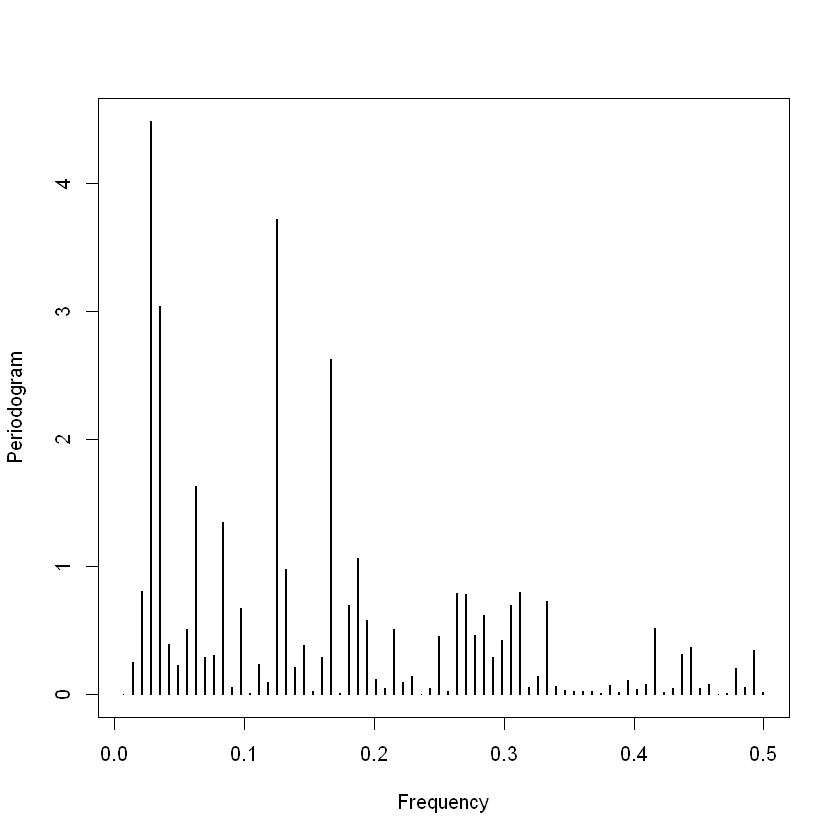

In [211]:
datos_n$infl_nt <- datos_n$IPC - datos_n$m
period_infl <- periodogram(datos_n$infl_nt[1:144])

In [214]:
period_datos <- data.frame(freq = period_infl$freq, spec = period_infl$spec)
head(period_datos, 30)

freq,spec
0.006944444,0.0005839561
0.013888889,0.2500827457
0.020833333,0.8104092716
0.027777778,4.4877444513
0.034722222,3.0381207181
0.041666667,0.3892588307
0.048611111,0.2260166028
0.055555556,0.5080610065
0.062500000,1.6326434264
0.069444444,0.2888832997


In [216]:
omega_j <- c(0.028, 0.125, 0.167)
144 * omega_j

[1]  4.032 18.000 24.048

In [218]:
m <- ncol(datos_n)
for (i in 1:length(omega_j)) {
     datos_n[, m + i] <- cos(2*pi*omega_j[i]*datos_n$t)
}

In [222]:
colnames(datos_n)[9:11] <- paste("W", 1:3, sep ="")

In [223]:
m <- ncol(datos_n)
for (i in 1:length(omega_j)) {
    datos_n[, m + i] <- sin(2*pi*omega_j[i]*datos_n$t)
}

In [226]:
colnames(datos_n)[12:14] <- paste("Z", 1:3, sep = "")

In [229]:
s_mod <- lm(infl_nt ~ W1 + W2 + W3 + Z1 + Z2 + Z3, data = datos_n[1:144,])
summary(s_mod)


Call:
lm(formula = infl_nt ~ W1 + W2 + W3 + Z1 + Z2 + Z3, data = datos_n[1:144, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97713 -0.29278  0.00003  0.24709  1.50946 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0007136  0.0347710   0.021 0.983655    
W1          -0.1687321  0.0489937  -3.444 0.000761 ***
W2           0.2255849  0.0491723   4.588    1e-05 ***
W3           0.0522635  0.0491598   1.063 0.289591    
Z1           0.1878291  0.0493532   3.806 0.000212 ***
Z2          -0.0083712  0.0491718  -0.170 0.865069    
Z3           0.1820794  0.0491850   3.702 0.000309 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4172 on 137 degrees of freedom
Multiple R-squared:  0.3128,	Adjusted R-squared:  0.2827 
F-statistic: 10.39 on 6 and 137 DF,  p-value: 1.765e-09


In [231]:
datos_n$s <- c(predict(s_mod), rep(0, 12))

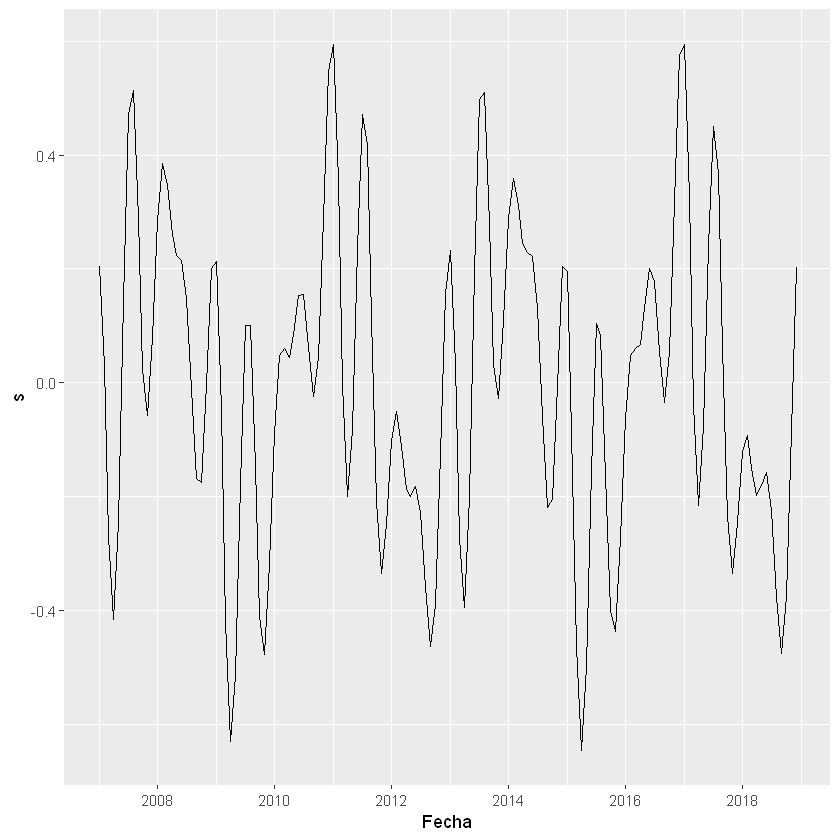

In [232]:
g <- ggplot(data = datos_n[1:144,], aes(x = Fecha, y = s))
g + geom_line()

In [234]:
datos_n$infl_ntns <- datos_n$infl_nt - datos_n$s

Ahora que ya tenemos la serie sin tendencia y sin estacionalidad procedemos a modelarla a través del enfoque ARMA. En primer lugar analizamos la ACF y PACF:

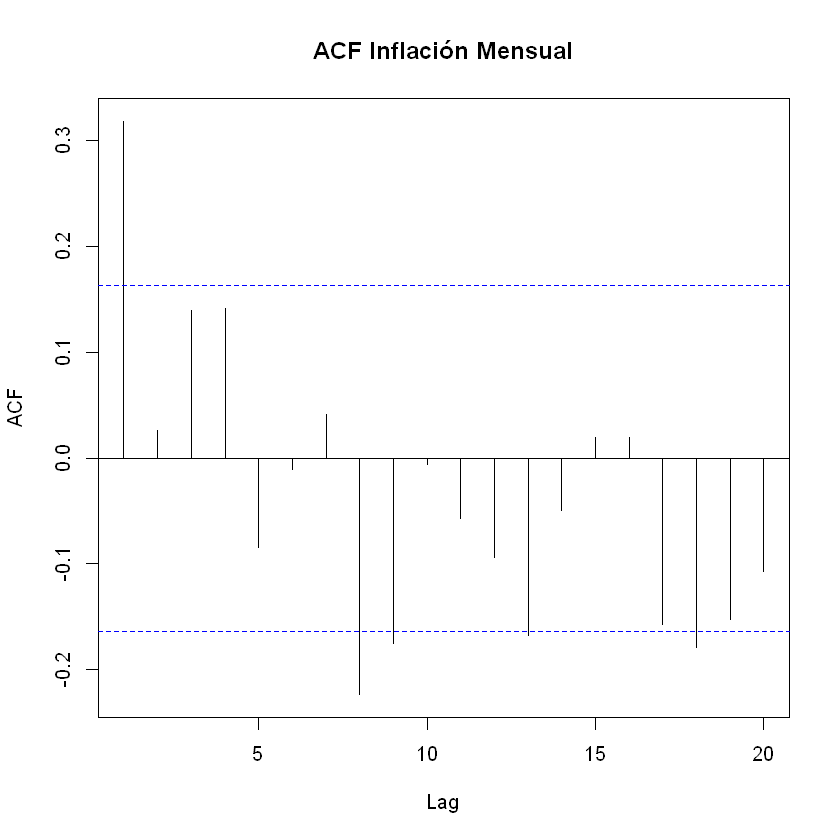

In [235]:
acf(datos_n$infl_ntns[1:144], lag.max = 20, main = "ACF Inflación Mensual")

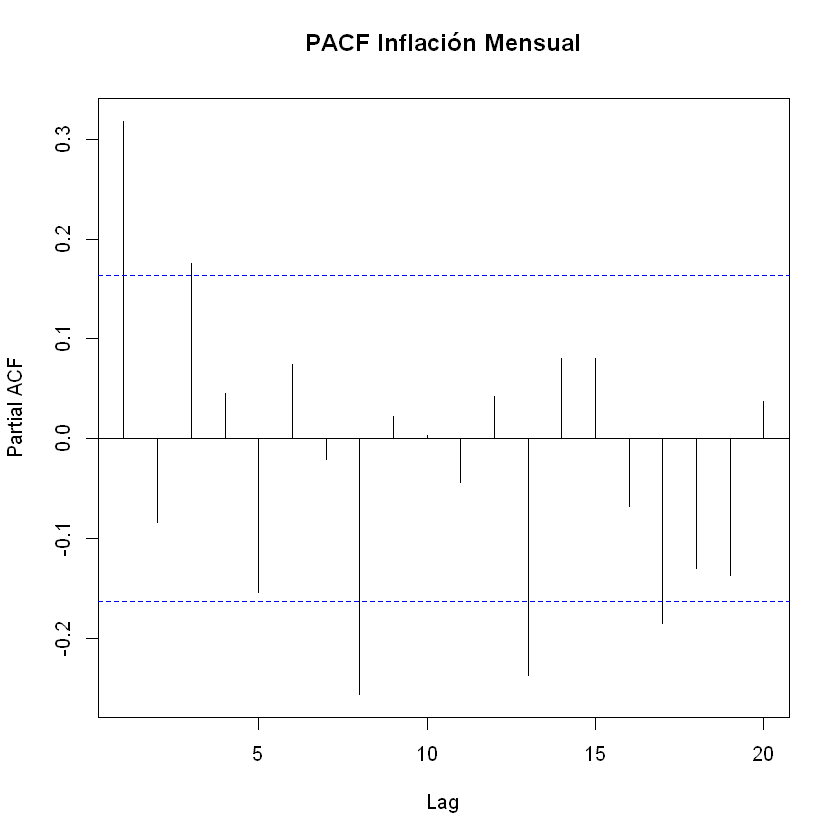

In [236]:
pacf(datos_n$infl_ntns[1:144], lag.max = 20, main = "PACF Inflación Mensual")

Los modelos candidatos son: AR(1), AR(8), AR(13), MA(8), ARMA(1, 8), ARMA(8, 8), ARMA(13, 8). Utilizaremos los criterios de Akaike y Schwartz para escoger el modelo más idóneo:


In [240]:
for (j in c(0, 8)) {
    for (i in c(0, 1, 8, 13)) {
        arma_mod <- arima(datos_n$infl_ntns[1:144], order = c(i, 0, j), method = "ML")
        AIC_val <- AIC(arma_mod)
        BIC_val <- BIC(arma_mod)
        res_1 <- paste("ARMA(", i, ",", j, ") con un AIC de ", AIC_val, sep = "")
        res_2 <- paste("ARMA(", i, ",", j, ") con un BIC de ", BIC_val, sep = "")
        print(res_1)
        print(res_2)
    }
}

[1] "ARMA(0,0) con un AIC de 153.72824345639"
[1] "ARMA(0,0) con un BIC de 159.667870055542"
[1] "ARMA(1,0) con un AIC de 140.49186931247"
[1] "ARMA(1,0) con un BIC de 149.401309211198"
[1] "ARMA(8,0) con un AIC de 133.738176262601"
[1] "ARMA(8,0) con un BIC de 163.436309258361"
[1] "ARMA(13,0) con un AIC de 132.322114128155"
[1] "ARMA(13,0) con un BIC de 176.869313621795"
[1] "ARMA(0,8) con un AIC de 135.974488092168"
[1] "ARMA(0,8) con un BIC de 165.672621087928"
[1] "ARMA(1,8) con un AIC de 125.51243182983"
[1] "ARMA(1,8) con un BIC de 158.180378125166"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "ARMA(8,8) con un AIC de 119.058380712235"
[1] "ARMA(8,8) con un BIC de 172.515020104603"
[1] "ARMA(13,8) con un AIC de 119.731251595908"
[1] "ARMA(13,8) con un BIC de 188.036957486156"


Guiandonos por el criterio BIC, considerariamos la opción de un AR(1).

In [241]:
ar1_mod <- arima(datos_n$infl_ntns[1:144], order = c(1, 0, 0), method = "CSS")

Ahora construimos los pronósticos:

In [246]:
ar1_for <- predict(ar1_mod, n.ahead = 3)

In [248]:
datos_n$ar1_for <- c(rep(0, 144), ar1_for$pred, rep(0, 9))

In [249]:
s_for <- predict(s_mod, newdata = datos_n[145:147,])

In [251]:
m_for <- predict(m_mod, newdata = datos_n[145:147,])

In [252]:
datos_n$s_for <- c(rep(0, 144), s_for, rep(0, 9))
datos_n$m_for <- c(rep(0, 144), m_for, rep(0, 9))

In [253]:
datos_n$infl_for <- datos_n$ar1_for + datos_n$s_for + datos_n$m_for
datos_for <- data.frame(Fecha = datos_n$Fecha[145:147], Infl_Obs = datos_n$IPC[145:147], Infl_For = datos_n$infl_for[145:147])
head(datos_for)

Fecha,Infl_Obs,Infl_For
2019-01-01,0.22627512,0.43916817
2019-02-01,-0.15241018,0.23499976
2019-03-01,-0.01703759,-0.05319906


In [255]:
rmse_infl <- sqrt(mean((datos_for$Infl_Obs - datos_for$Infl_For)^2))
rmse_infl

[1] 0.2560713